# **Import Package**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import missingno as msno

# **Reading the data**

In [2]:
import openpyxl
path = 'online_retail_II.xlsx'
sheet1 = pd.read_excel(path, sheet_name=0, engine=None)
sheet2 = pd.read_excel(path, sheet_name=1, engine=None)
df = pd.concat([sheet1, sheet2], axis=0, ignore_index=True)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">
    <h2><strong>Dataset Details:</strong></h2>
    This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.<br>
    Link - <a href="https://archive.ics.uci.edu/dataset/502/online+retail+ii" target="_blank">Online Retail Transaction Data</a>


#### **Column Details**
- **`InvoiceNo`:**
    - Invoice number.
    - Nominal.
    - A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.  
- **`StockCode`:**
    - Product (item) code.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each distinct product.  
- **`Description`:**
    - Product (item) name.
    - Nominal.  
- **`Quantity`:**
    - The quantities of each product (item) per transaction.
    - Numeric.  
- **`InvoiceDate`:**
    - Invoice date and time.
    - Numeric.
    - The day and time when a transaction was generated.
- **`Price`:**
    - Unit price.
    - Numeric.
    - Product price per unit in sterling (Â£).  
- **`CustomerID`:**
    - Customer number.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each customer.  
- **`Country`:**
    - Country name.
    - Nominal.
    - The name of the country where a customer resides.
</div>

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### **Data types of each column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### **Summarization of Data**

In [5]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628.0,5305,5698,NaN,NaN,NaN,NaN,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1350.0,5829,5918,NaN,NaN,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,NaN
min,NaN,NaN,NaN,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,NaN
max,NaN,NaN,NaN,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,NaN


### **How many records are there in the dataset?**

In [6]:
print("Number of records in the dataset: ", df.shape[0])

Number of records in the dataset:  1067371


### **Missing Value Analysis**

In [7]:
df.isnull().sum() / df.shape[0] * 100

,0
Invoice,0.000000
StockCode,0.000000
Description,0.410541
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,22.766873
Country,0.000000


<Axes: >

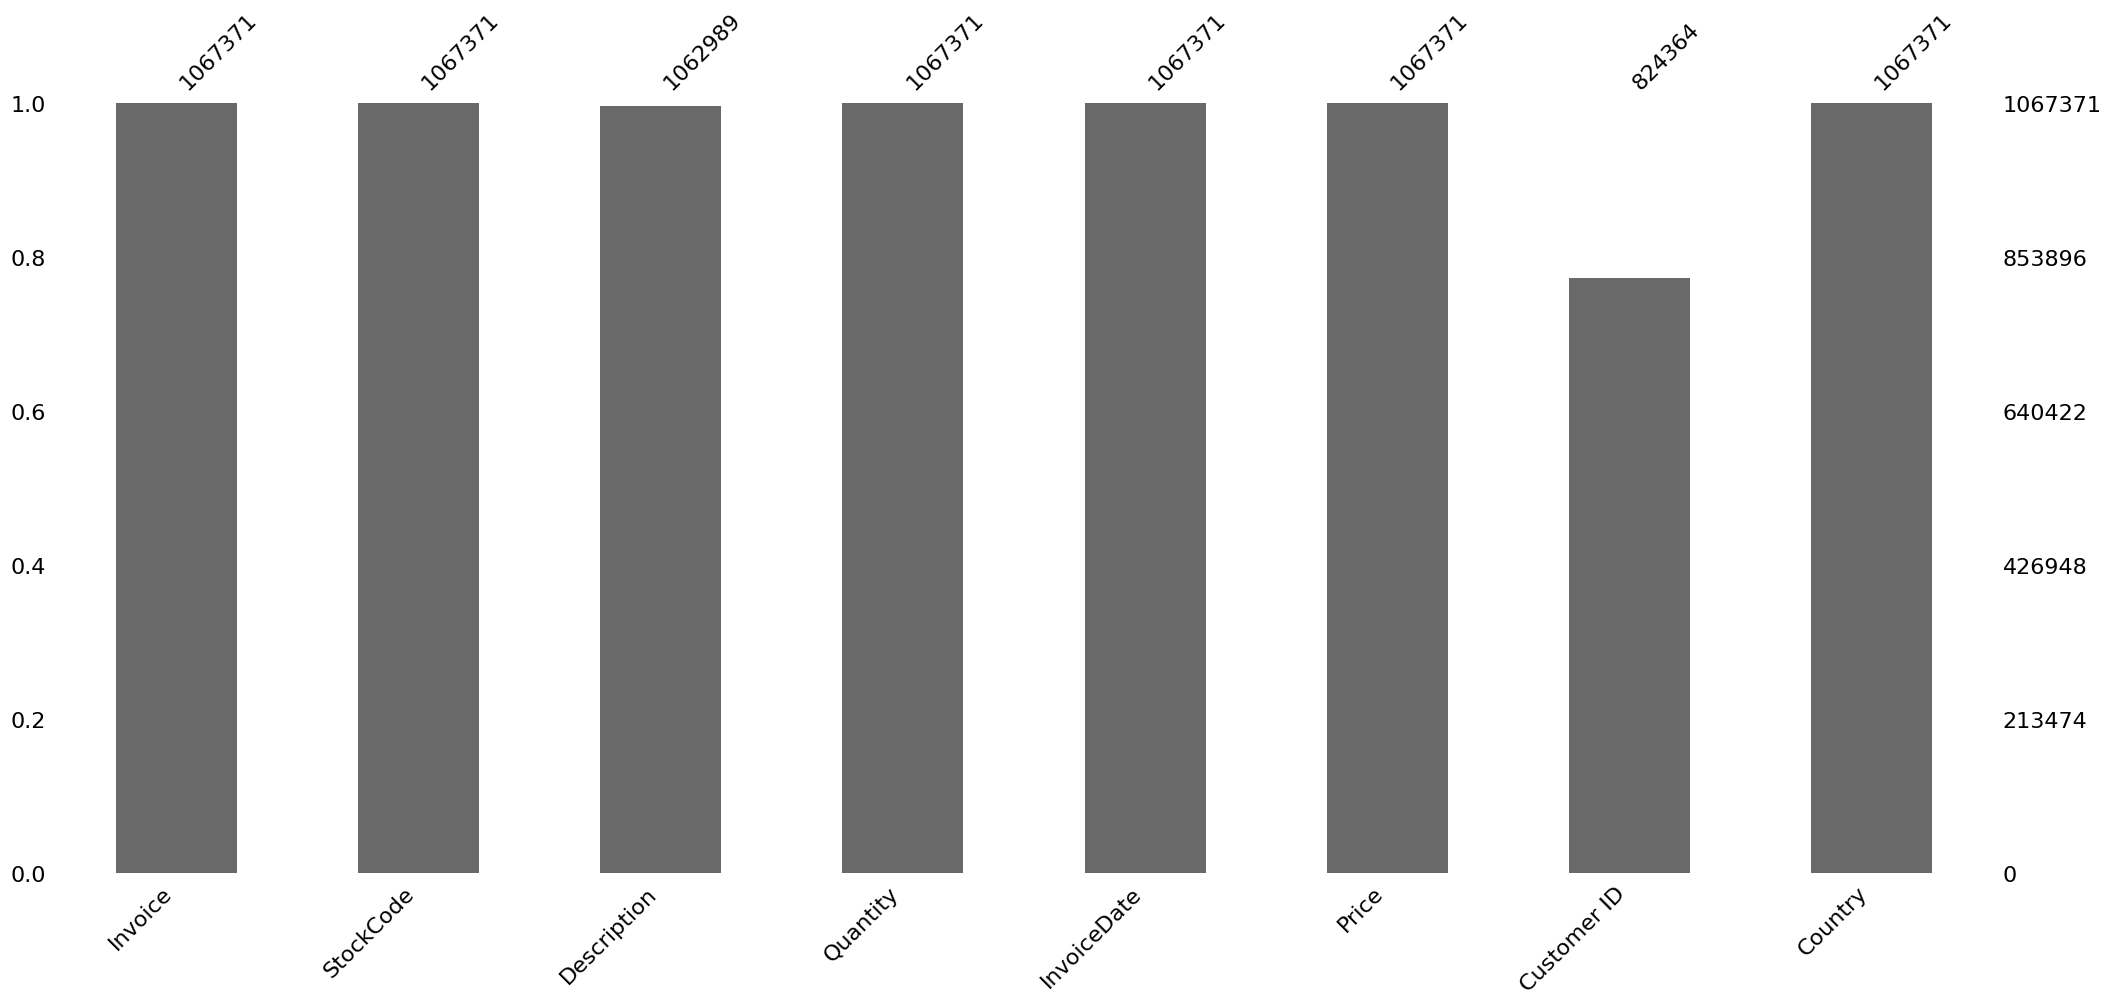

In [8]:
msno.bar(df)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**  
From the above missing value analysis, it is evident that two columns are missing majority of data while other columns has no missing data.

The column names are:
- **`Description (0.411 %)`**
- **`Customer ID (22.767 %)`**
</div>

In [9]:
df[df['Description'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


In [10]:
print("Number of records with missing Description: ", df[df['Description'].isna()].shape[0])

Number of records with missing Description:  4382


In [11]:
df[df['Description'].isna()]['Price'].value_counts()

,count
Price,
0.0,4382


In [12]:
df[df['Description'].isna()]['Customer ID'].value_counts()

,count
Customer ID,


In [13]:
quantity_type = df[df['Description'].isna()]['Quantity'].value_counts()
quantity_type = quantity_type.reset_index()
quantity_type['Quantity Type'] = quantity_type['Quantity'].apply(lambda a: 'Less than 0' if a < 0 else 'Otherwise')
quantity_type.groupby('Quantity Type')['count'].sum()

,count
Quantity Type,
Less than 0,2689
Otherwise,1693


<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**    
There are **4382** rows where the **`Description`** column has missing values.  

Upon further analysis, the **`Price`** column has only **0.0** values for each of the missing value of the **`Description`** column.  
The corresponding **`Customer ID`** is also missing.  
Along with that, the **`Quantity`** column has majority values less than **0**, which does not make any sense.  
  
The data might be either corrupted or recorded wrongly for these entries.  
This data should be dropped so that it does not affect the efficiency of ML models adversely.
</div>

In [14]:
df.dropna(subset=['Description'], inplace=True)

In [15]:
df.shape

(1062989, 8)

In [16]:
df[df['Customer ID'].isna()].shape[0]

238625

In [17]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0)].shape[0]

768

In [18]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0)].shape[0]

981

In [19]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0)].shape[0]

749

In [20]:
df[(df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0)].shape[0]

5

In [21]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] > 0)].shape[0]

236122

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**
- There are **238625** missing values in the **`Customer ID`** column.
- There are multiple records in the data where the **`Customer ID`** is missing and the values of other prominant columns like **`Quantity`** and **`Price`** does not make any sense.
    - There are **768** records where **`Price`** is **0.0** but the **`Quantity`** is less than **0**.  
    - There ate **981** records whre **`Price`** is equal to **0.0** but **`Quantity`** is greater than **0**.
    - There are **5** records where the **`Price`** is negative.
    - Finally, there are **749** records where **`Price`** is greater than **0.0** but the **`Quantity`** is less than **0**.
- These ambiguous records which holds no logic needs to be dropped.
- There are **236122** records which are logical but the **`Customer ID`** is missing can be handled by imputing with some common value like **Unknown Customer ID**.

</div>

In [22]:
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0))]

In [23]:
df[df['Customer ID'].isna()].shape[0]

236122

In [24]:
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

In [25]:
df['Customer ID'].head()

,Customer ID
0,13085
1,13085
2,13085
3,13085
4,13085


In [26]:
df['Customer ID'] = df['Customer ID'].astype(str)
df['Customer ID'] = df['Customer ID'].apply(lambda x: "Unknown Customer ID" if x=='0' else x)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [27]:
df['Customer ID'].value_counts()

,count
Customer ID,
Unknown Customer ID,236122
17841,13097
14911,11613
12748,7307
14606,6709
...,...
16663,1
17752,1
13942,1


In [28]:
df['StockCode'] = df['StockCode'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060486 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1060486 non-null  object        
 1   StockCode    1060486 non-null  category      
 2   Description  1060486 non-null  object        
 3   Quantity     1060486 non-null  int64         
 4   InvoiceDate  1060486 non-null  datetime64[ns]
 5   Price        1060486 non-null  float64       
 6   Customer ID  1060486 non-null  object        
 7   Country      1060486 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 66.9+ MB


In [30]:
df.drop(columns=['InvoiceDate']).describe()

,Quantity,Price
count,1.060486e+06,1.060486e+06
mean,1.032382e+01,4.427132e+00
std,1.667588e+02,7.607323e+01
min,-8.099500e+04,0.000000e+00
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [31]:
df[df['Quantity'] < 0]['Price'].value_counts().sort_index(), df[df['Quantity'] < 0]['Price'].value_counts().sort_index().sum()

(Price
 0.01        2
 0.03        5
 0.05        3
 0.06        4
 0.07        5
            ..
 8985.60     1
 10468.80    2
 10953.50    2
 25111.09    1
 38970.00    1
 Name: count, Length: 687, dtype: int64,
 18744)

#### **Separating the Cancelled Orders from All Orders**

In [32]:
df_cancelled = df[(df['Invoice'].str.startswith('C')) & (df['Invoice'].isna()==False)]
df_cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia


In [33]:
df = df[~((df['Invoice'].str.startswith('C')) & (df['Invoice'].isna()==False))]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


#### **Total Sales Column Created**

In [34]:
df['Sales'] = df['Price'] * df['Quantity']
df.head()

<ipython-input-34-77e8da21e8a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Price'] * df['Quantity']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [35]:
df = df[~(df['Price'] <= 0)]

In [36]:
df[df['Price'] <= 0].shape[0]

0

In [37]:
df['Description'].nunique()

5399

#### **Dropping Duplicates**

In [38]:
df = df.drop_duplicates()

### **Exploratory Data Analysis**

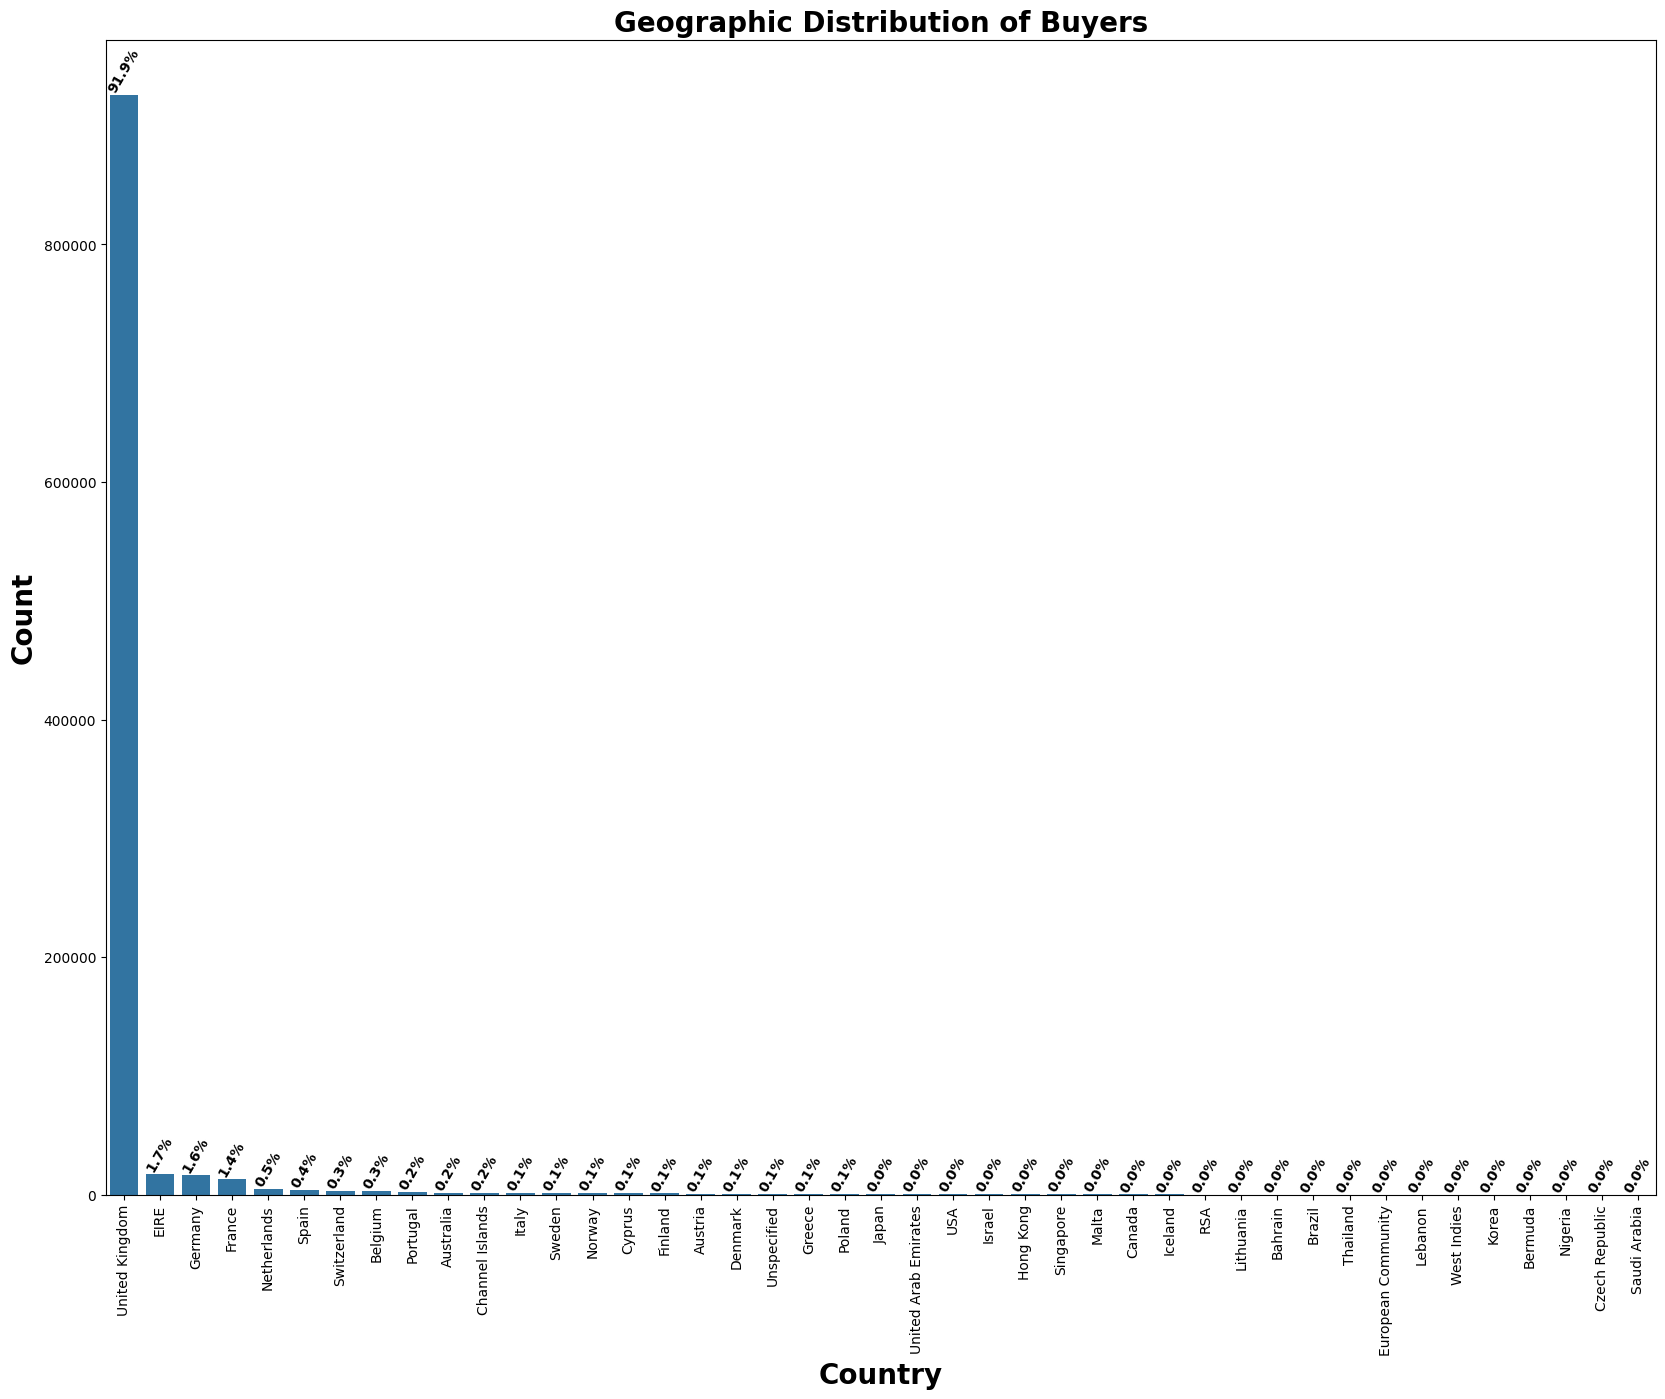

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
country_count = df['Country'].value_counts()
total_count = country_count.sum()
percent = country_count / total_count * 100

# Use Seaborn for visualization
sns.barplot(x=country_count.index, y=country_count.values)

# Annotate bars with percentages
for i, (value, pct) in enumerate(zip(country_count.values, percent)):
    plt.text(i, value, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=60)

plt.xlabel('Country', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.title('Geographic Distribution of Buyers', fontsize=20, fontweight='bold')
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

It is evident that more than 90% of buyers are from United Kingdom. Less than 10% of buyers are from other countries with no country has equal or more than 2% of buyer's share.
</div>

In [40]:
product_pivot = df.pivot_table(index="Description", values="Quantity", aggfunc='sum').reset_index().sort_values(by=['Quantity'], ascending=False)
product_pivot.head(10)

,Description,Quantity
5283,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
5162,WHITE HANGING HEART T-LIGHT HOLDER,94658
3187,"PAPER CRAFT , LITTLE BIRDIE",80995
303,ASSORTED COLOUR BIRD ORNAMENT,80082
2749,MEDIUM CERAMIC TOP STORAGE JAR,78033
2441,JUMBO BAG RED RETROSPOT,77699
769,BROCADE RING PURSE,70369
3123,PACK OF 60 PINK PAISLEY CAKE CASES,56061
160,60 TEATIME FAIRY CAKE CASES,54028
4615,SMALL POPCORN HOLDER,48561


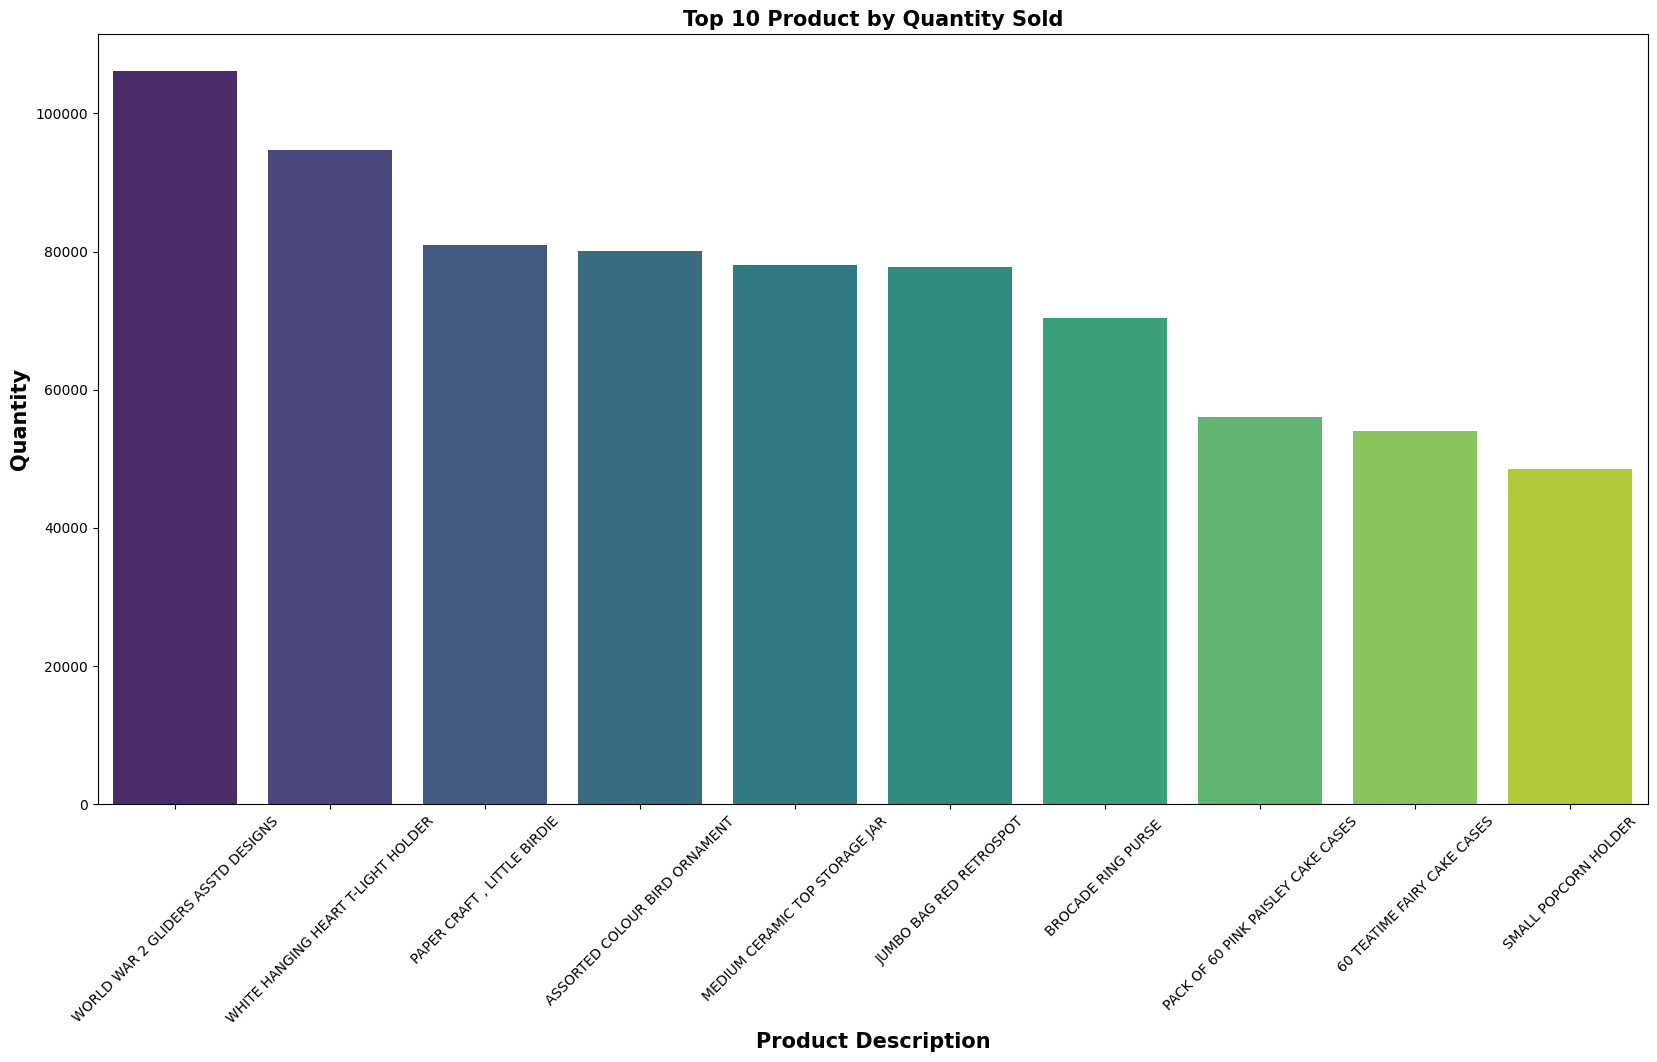

In [41]:
plt.figure(figsize=(20, 10))
sns.barplot(data=product_pivot.head(10), x='Description', y='Quantity', hue='Description',palette='viridis')
plt.xlabel('Product Description', fontsize=15, fontweight='bold')
plt.ylabel('Quantity', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title('Top 10 Product by Quantity Sold', fontsize=15, fontweight='bold')
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

The top selling products by the online retail store are --

- WORLD WAR 2 GLIDERS ASSTD DESIGNS
- WHITE HANGING HEART T-LIGHT HOLDER
- PAPER CRAFT , LITTLE BIRDIE
- ASSORTED COLOUR BIRD ORNAMENT
- MEDIUM CERAMIC TOP STORAGE JAR
- JUMBO BAG RED RETROSPOT
- BROCADE RING PURSE
- PACK OF 60 PINK PAISLEY CAKE CASES
- 60 TEATIME FAIRY CAKE CASES
- SMALL POPCORN HOLDER

</div>

In [42]:
top_customer = df.groupby(['Customer ID', 'Country'])[['Sales']].sum().sort_values(by='Sales',ascending=False).reset_index()
top_customer = top_customer[~(top_customer['Customer ID'] == 'Unknown Customer ID')]
top_customer.head(10)

,Customer ID,Country,Sales
1,18102,United Kingdom,580987.04
2,14646,Netherlands,528602.52
3,14156,EIRE,313437.62
4,14911,EIRE,291420.81
5,17450,United Kingdom,244784.25
6,13694,United Kingdom,195640.69
7,17511,United Kingdom,172132.87
8,16446,United Kingdom,168472.50
9,16684,United Kingdom,147142.77
10,12415,Australia,144458.37


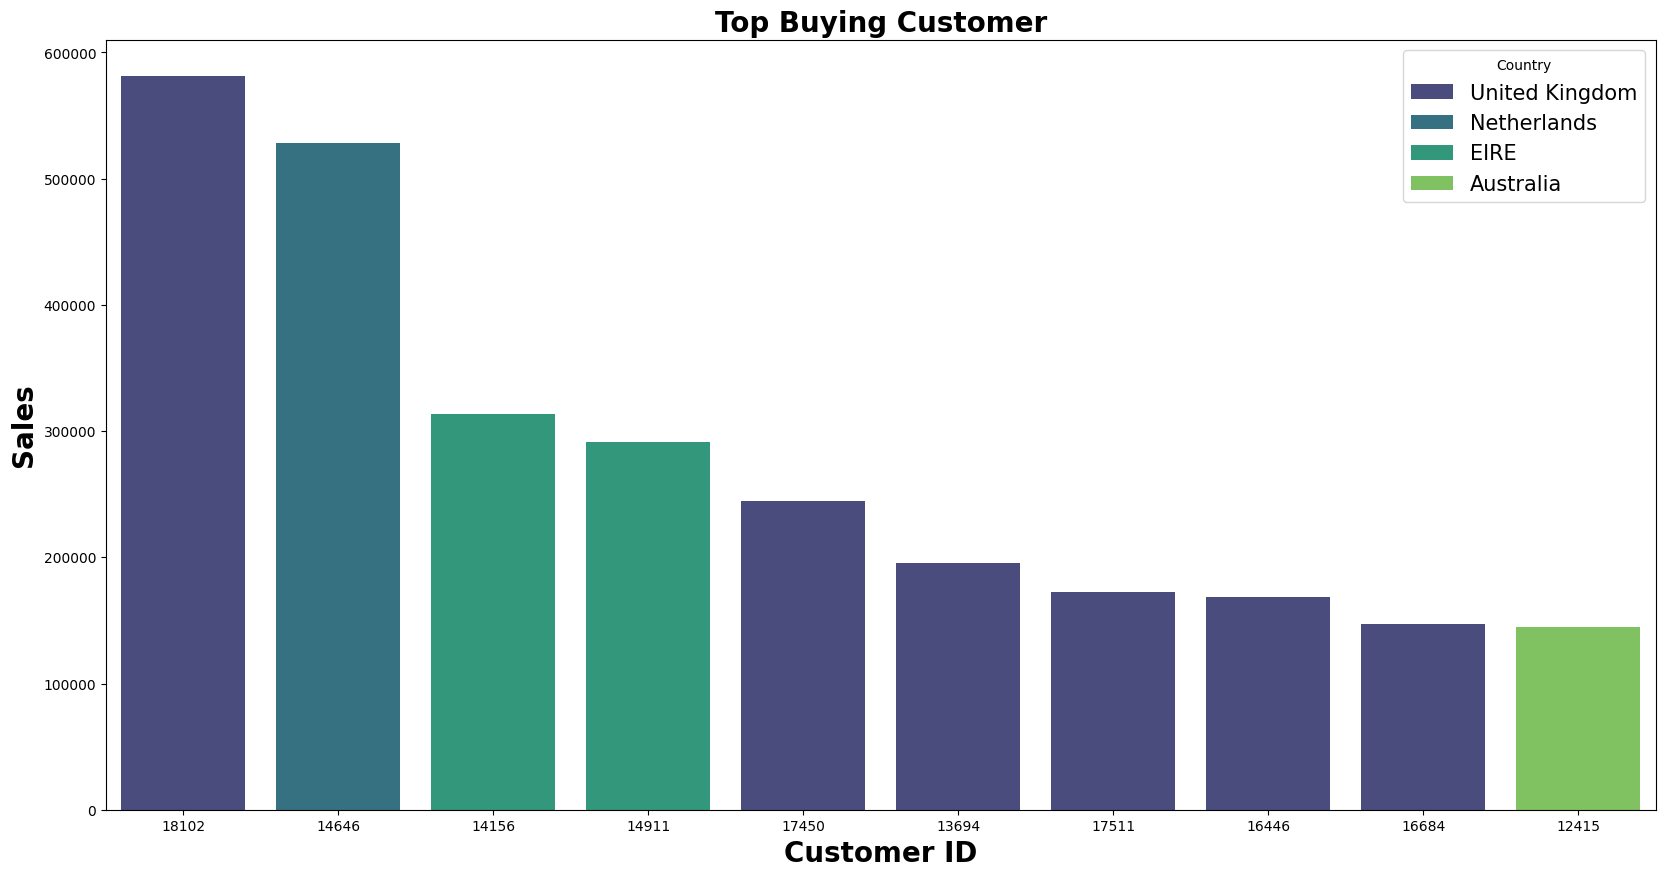

In [43]:
plt.figure(figsize=(20, 10))
sns.barplot(data=top_customer.head(10), x='Customer ID', y='Sales', hue='Country', palette='viridis')
plt.xlabel('Customer ID', fontsize=20, fontweight='bold')
plt.ylabel('Sales', fontsize=20, fontweight='bold')
plt.title('Top Buying Customer', fontsize=20, fontweight='bold')
plt.legend(title='Country', fontsize=15)
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the top 10 buying customer are in United Kingdom. Other countries include Netherlands, EIRE (Ireland) and Australia. These shows the online retail store has some good international buyers.

In [44]:
df1 = df.copy()
df1['Month'] = df['InvoiceDate'].dt.strftime('%B')
df1['Day'] = df['InvoiceDate'].dt.strftime('%A')
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,December,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,December,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,December,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,December,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,December,Tuesday


In [45]:
sales_by_month = df1.groupby('Month')[['Sales']].sum().reset_index()
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

sales_by_month['Month'] = pd.Categorical(sales_by_month['Month'], categories=month_order, ordered=True)
sales_by_month.sort_values('Month')

,Month,Sales
4,January,1340966.722
3,February,1074050.286
7,March,1547130.521
0,April,1215843.743
8,May,1427002.110
6,June,1510084.320
5,July,1366886.391
1,August,1453093.290
11,September,1978132.183
10,October,2313165.950


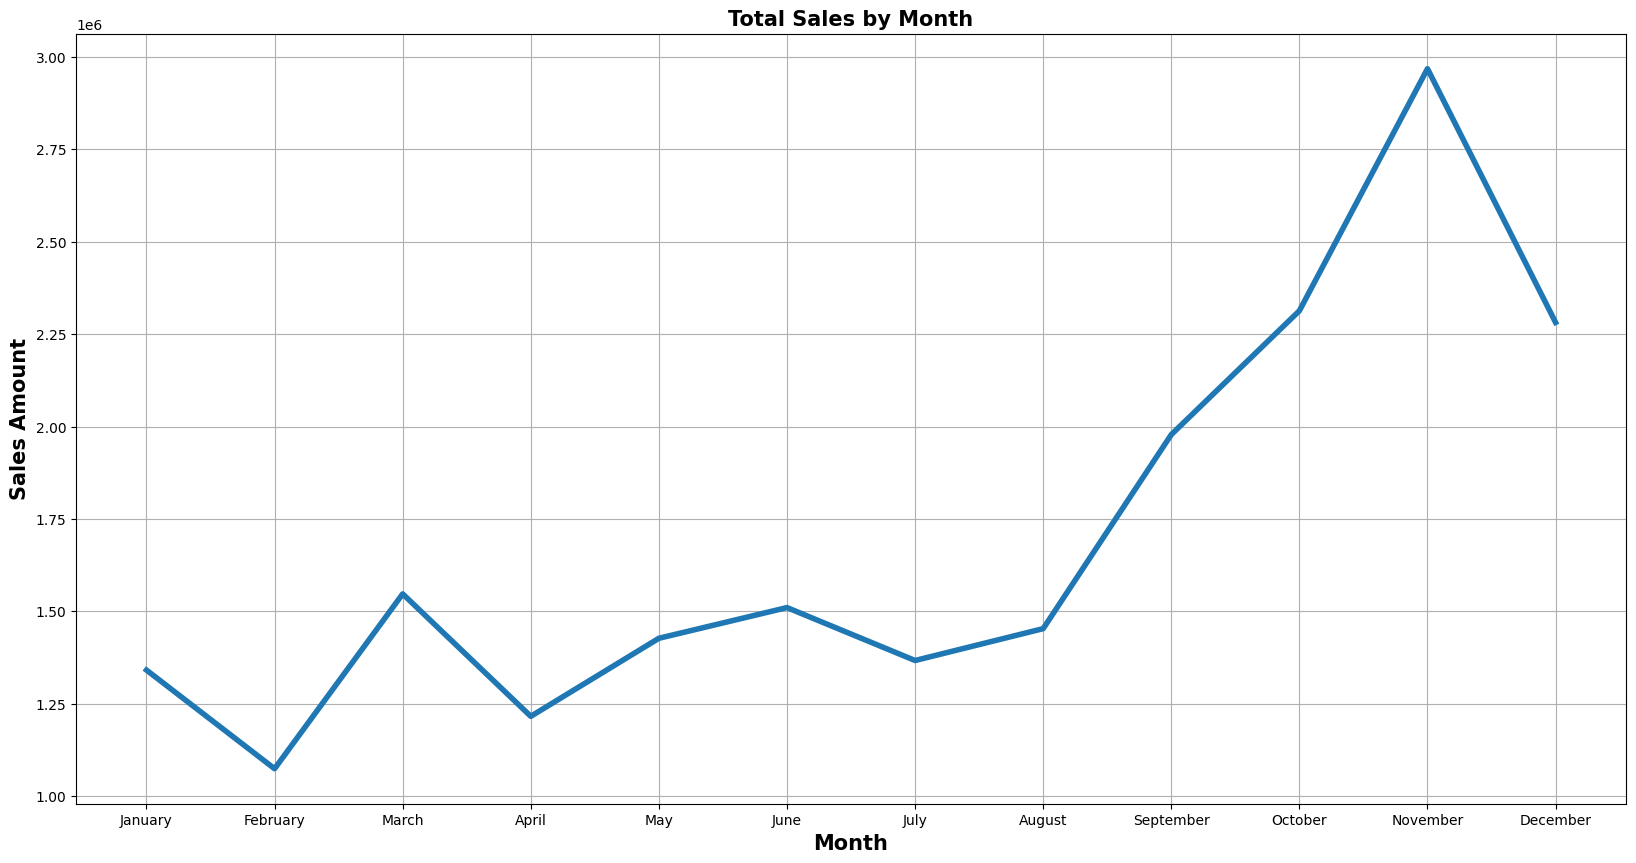

In [46]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=sales_by_month.sort_values('Month'), x='Month', y='Sales', linewidth=4)
plt.xlabel('Month', fontsize=15, fontweight='bold')
plt.ylabel('Sales Amount', fontsize=15, fontweight='bold')
plt.title('Total Sales by Month', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the sales happens during the second half of the year with most sales happening in the month of November. Most of the festivites are celebrated towards the end of the year. As a result the sales of products happen during this time.

Low sales are primarily in the month of February and April.

In [47]:
sales_by_day = df1.groupby('Day')[['Sales']].sum().reset_index()
day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
sales_by_day['Day'] = pd.Categorical(sales_by_day['Day'], categories=day_order, ordered=True)
sales_by_day.sort_values('Day')

,Day,Sales
1,Monday,3581594.176
5,Tuesday,4078149.962
6,Wednesday,3488444.333
4,Thursday,4195212.762
0,Friday,3323908.883
2,Saturday,9803.050
3,Sunday,1799147.282


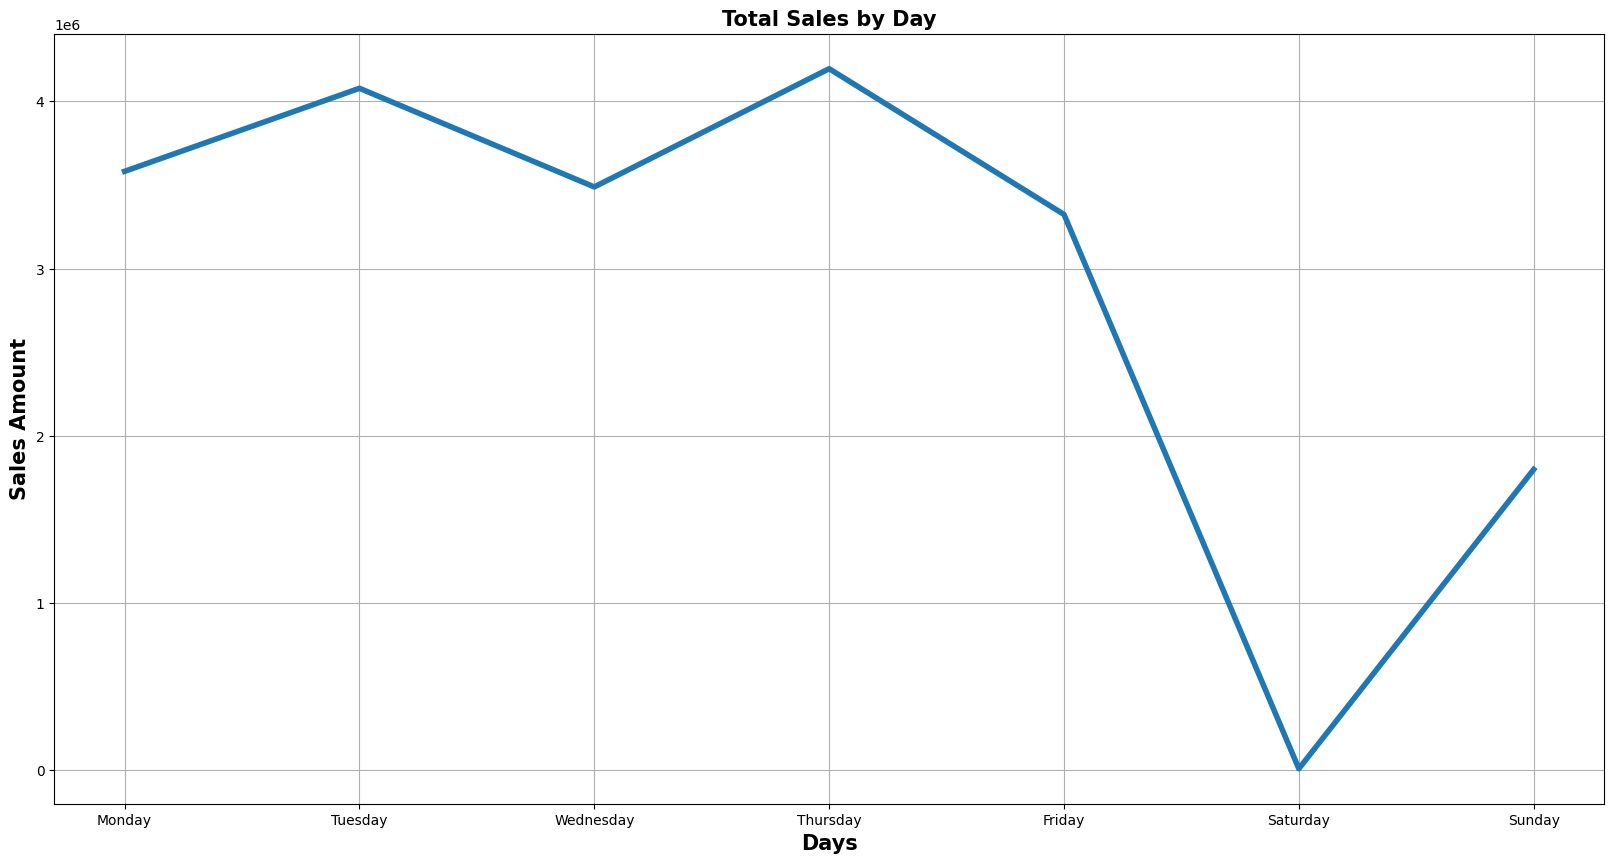

In [48]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=sales_by_day.sort_values('Day'), x='Day', y='Sales', linewidth=4)
plt.xlabel('Days', fontsize=15, fontweight='bold')
plt.ylabel('Sales Amount', fontsize=15, fontweight='bold')
plt.title('Total Sales by Day', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the sales happen during the weekdays. During weekends sales are quite low.

</div>

# **COUNTRY - UNITED KINGDOM**

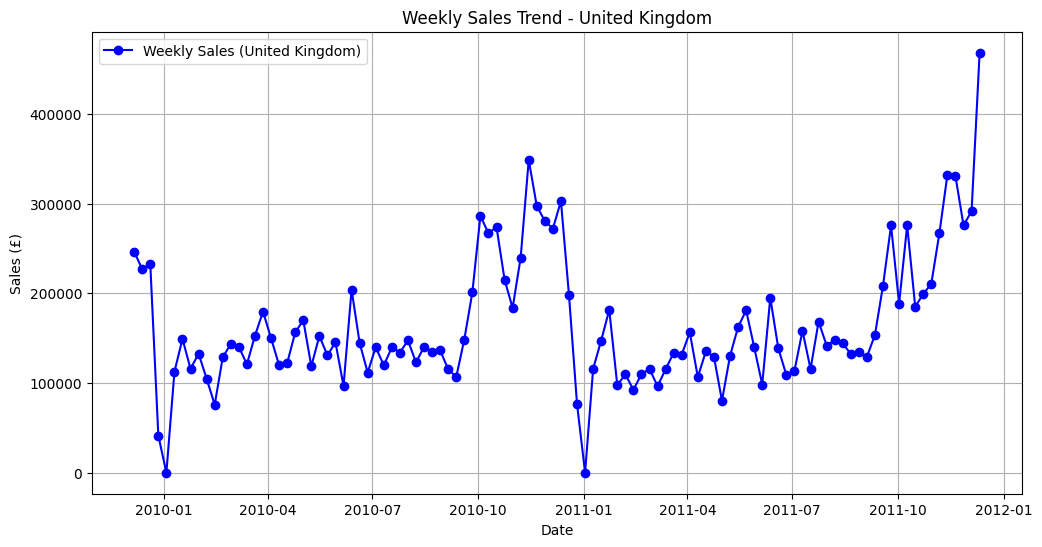

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already cleaned and structured as per project details)

# Filter data for United Kingdom
df_uk = df[df["Country"] == "United Kingdom"].copy()

# Resample weekly sales data
weekly_sales_uk = df_uk.resample('W', on='InvoiceDate')["Sales"].sum()

# Plot the weekly sales trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales_uk, label="Weekly Sales (United Kingdom)", color='blue', marker='o')
plt.xlabel("Date")
plt.ylabel("Sales (£)")
plt.title("Weekly Sales Trend - United Kingdom")
plt.legend()
plt.grid()
plt.show()


In [50]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

weekly_sales_uk = df_uk.resample('W', on='InvoiceDate')["Sales"].sum()

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(weekly_sales_uk)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])  # If p-value < 0.05, data is stationary

ADF Statistic: -0.7380837661019877
p-value: 0.8366368844706467


In [51]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS Test
kpss_test = kpss(weekly_sales_uk, regression="c")

# Print KPSS Test Results
print("KPSS Statistic:", kpss_test[0])
print("p-value:", kpss_test[1])
print("Critical Values:", kpss_test[3])

KPSS Statistic: 0.3369165250369211
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-51-44669a143ac0>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(weekly_sales_uk, regression="c")


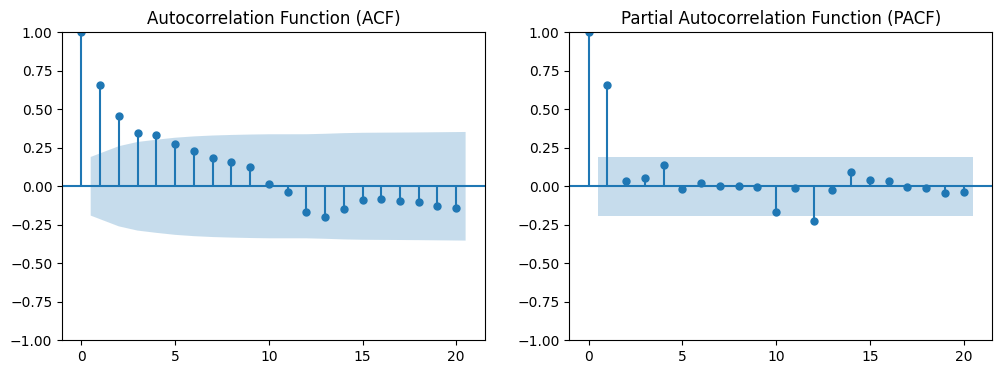

In [52]:
# Plot ACF and PACF to check for AR and MA components
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(weekly_sales_uk, lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
sm.graphics.tsa.plot_pacf(weekly_sales_uk, lags=20, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

MAPE for ARIMA(1,1,2): 0.2917


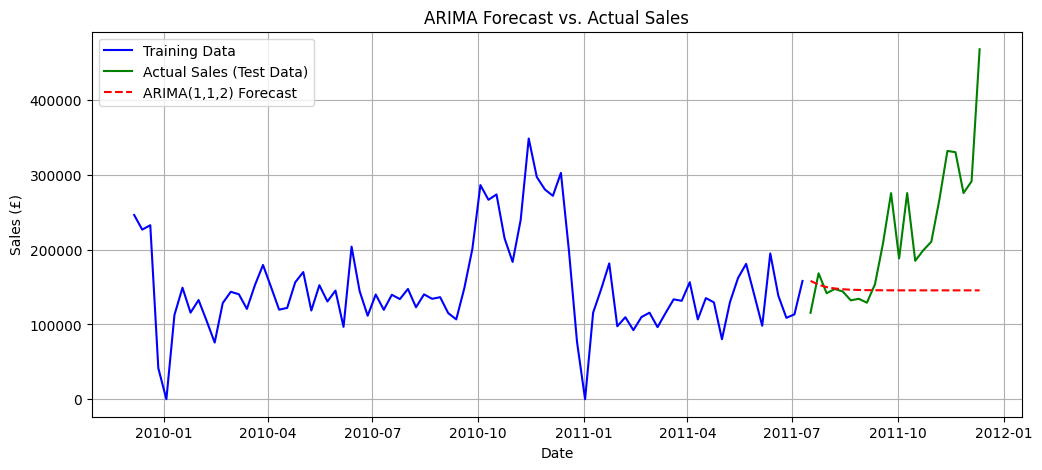

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Train-Test Split (80% Train, 20% Test)
split_index = int(len(weekly_sales_uk) * 0.8)
train, test = weekly_sales_uk[:split_index], weekly_sales_uk[split_index:]

# Step 2: Fit ARIMA(1,1,2) Model on Training Data
arima_model = ARIMA(train, order=(1,1,2))
arima_fit = arima_model.fit()

# Step 3: Forecast for the Test Period
forecast_arima = arima_fit.forecast(steps=len(test))

# Step 4: Evaluate Model Performance using MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(test, forecast_arima)

# Print MAPE Score
print(f"MAPE for ARIMA(1,1,2): {mape:.4f}")

# Step 5: Plot Actual vs. Forecasted Values
plt.figure(figsize=(12,5))
plt.plot(train, label="Training Data", color='blue')
plt.plot(test, label="Actual Sales (Test Data)", color='green')
plt.plot(test.index, forecast_arima, label="ARIMA(1,1,2) Forecast", linestyle='dashed', color='red')
plt.title("ARIMA Forecast vs. Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales (£)")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for ARIMA(1,1,2): 0.2565


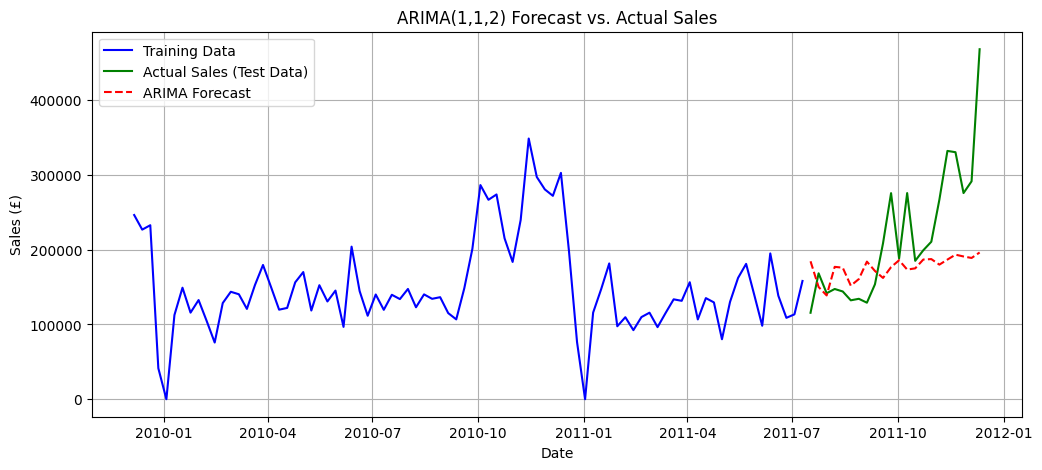

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Train-Test Split (80% Train, 20% Test)
split_index = int(len(weekly_sales_uk) * 0.8)
train, test = weekly_sales_uk[:split_index], weekly_sales_uk[split_index:]

# Step 2: Fit ARIMA(1,1,2) Model on Training Data
arima_model = ARIMA(train, order=(3,2,4))
arima_fit = arima_model.fit()

# Step 3: Forecast for the Test Period
forecast_arima = arima_fit.forecast(steps=len(test))

# Step 4: Evaluate Model Performance using MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(test, forecast_arima)

# Print MAPE Score
print(f"MAPE for ARIMA(1,1,2): {mape:.4f}")

# Step 5: Plot Actual vs. Forecasted Values
plt.figure(figsize=(12,5))
plt.plot(train, label="Training Data", color='blue')
plt.plot(test, label="Actual Sales (Test Data)", color='green')
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", linestyle='dashed', color='red')
plt.title("ARIMA(1,1,2) Forecast vs. Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales (£)")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for ARIMA: 0.3142


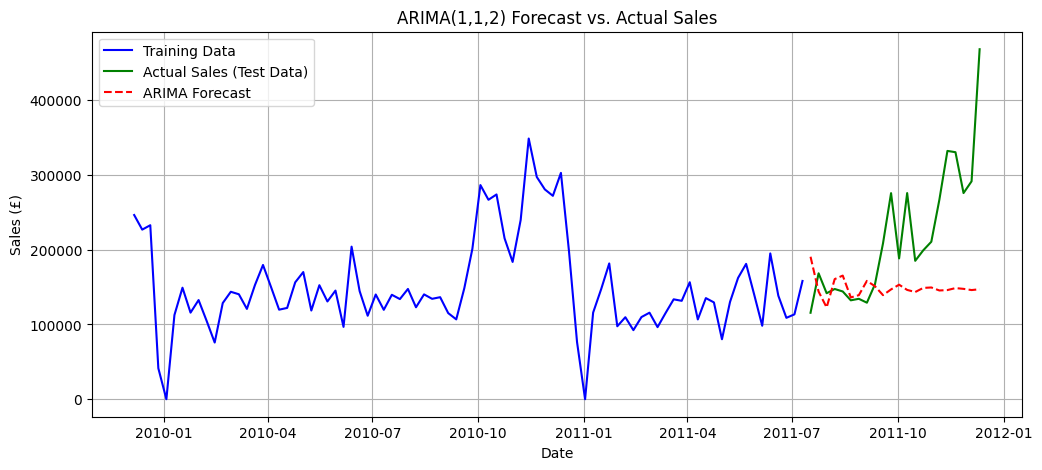

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Step 1: Train-Test Split (80% Train, 20% Test)
split_index = int(len(weekly_sales_uk) * 0.8)
train, test = weekly_sales_uk[:split_index], weekly_sales_uk[split_index:]

# Step 2: Fit ARIMA(1,1,2) Model on Training Data
arima_model = ARIMA(train, order=(5,1,3))
arima_fit = arima_model.fit()

# Step 3: Forecast for the Test Period
forecast_arima = arima_fit.forecast(steps=len(test))

# Step 4: Evaluate Model Performance using MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(test, forecast_arima)

# Print MAPE Score
print(f"MAPE for ARIMA: {mape:.4f}")

# Step 5: Plot Actual vs. Forecasted Values
plt.figure(figsize=(12,5))
plt.plot(train, label="Training Data", color='blue')
plt.plot(test, label="Actual Sales (Test Data)", color='green')
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", linestyle='dashed', color='red')
plt.title("ARIMA(1,1,2) Forecast vs. Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales (£)")
plt.legend()
plt.grid()
plt.show()

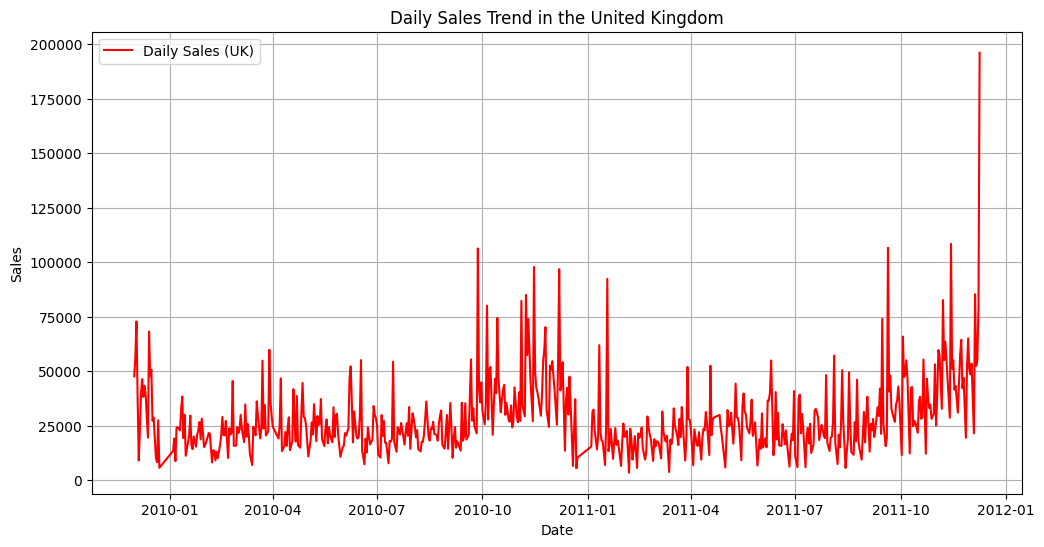

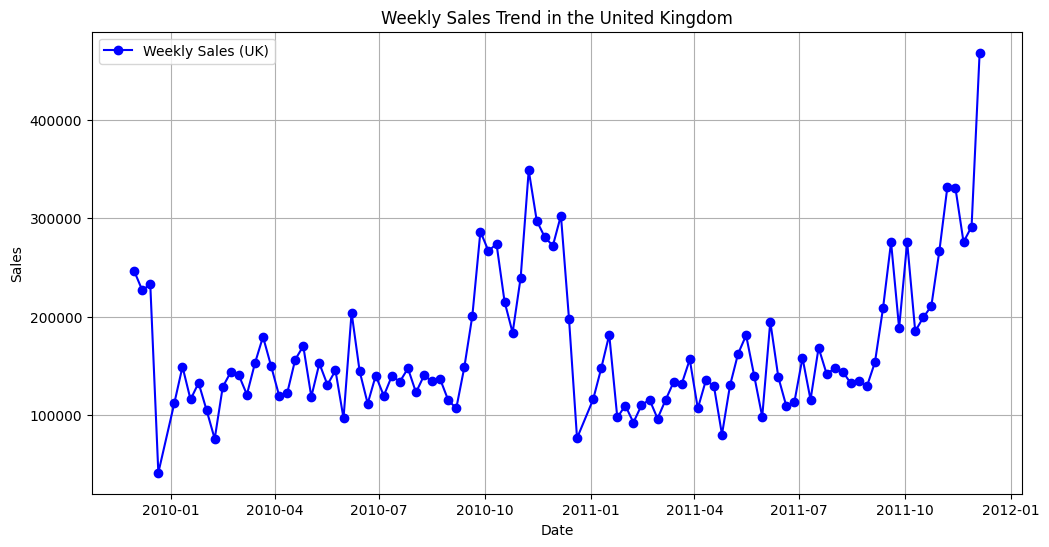

In [56]:
# Aggregate daily sales for UK
daily_sales_uk = df_uk.groupby(df_uk['InvoiceDate'].dt.date)['Sales'].sum()

# Aggregate weekly sales for UK
df_uk['Week'] = df_uk['InvoiceDate'].dt.to_period('W')
weekly_sales_uk = df_uk.groupby('Week')['Sales'].sum()

# Convert to datetime index for plotting
daily_sales_uk.index = pd.to_datetime(daily_sales_uk.index)
weekly_sales_uk.index = weekly_sales_uk.index.to_timestamp()

# Plot daily sales trend for UK
plt.figure(figsize=(12,6))
plt.plot(daily_sales_uk, linestyle='-', label="Daily Sales (UK)", color='r')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Trend in the United Kingdom")
plt.legend()
plt.grid()
plt.show()

# Plot weekly sales trend for UK
plt.figure(figsize=(12,6))
plt.plot(weekly_sales_uk, marker='o', linestyle='-', label="Weekly Sales (UK)", color='b')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Weekly Sales Trend in the United Kingdom")
plt.legend()
plt.grid()
plt.show()


In [57]:
daily_sales_uk

,Sales
InvoiceDate,
2009-12-01,47668.86
2009-12-02,55875.26
2009-12-03,72820.90
2009-12-04,37966.35
2009-12-05,9042.36
...,...
2011-12-05,85331.87
2011-12-06,52484.19
2011-12-07,55214.81


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/8vkhx9nv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/qnju5j5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66718', 'data', 'file=/tmp/tmpfzigd_5r/8vkhx9nv.json', 'init=/tmp/tmpfzigd_5r/qnju5j5z.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modeln4nfy7et/prophet_model-20250303003617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


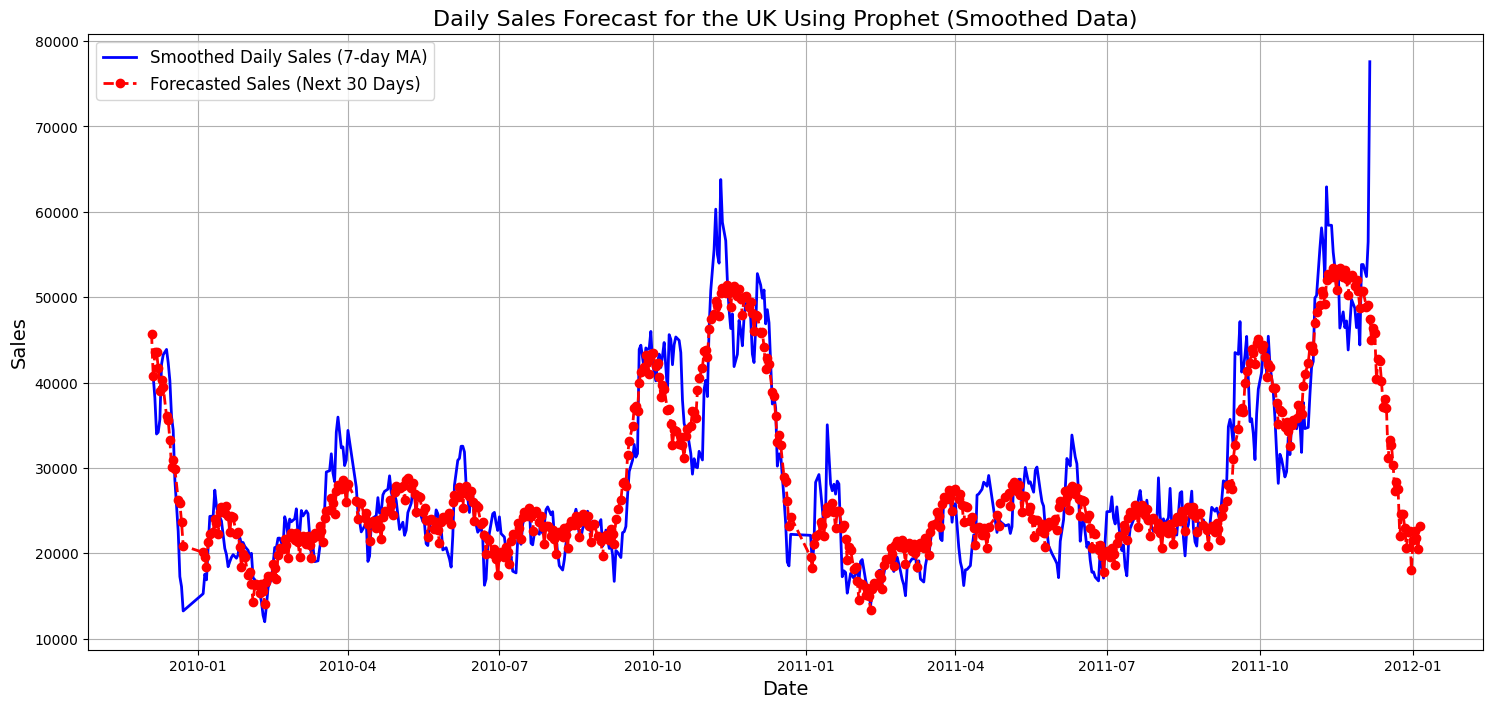

            ds          yhat    yhat_lower    yhat_upper
598 2011-12-07  45002.714766  39865.171935  50413.376570
599 2011-12-08  46417.819482  41122.076212  51373.705022
600 2011-12-09  45821.424575  40080.445415  51487.180947
601 2011-12-10  40398.042915  34952.978363  45816.538842
602 2011-12-11  42789.655503  37492.108556  47959.180494
603 2011-12-12  42483.348683  37132.413201  48277.293230
604 2011-12-13  40225.414747  34901.191432  45479.553447
605 2011-12-14  37188.172475  31736.182437  42645.777829
606 2011-12-15  38077.108627  32623.622175  43416.876270
607 2011-12-16  37010.662398  31546.781605  42324.528112
608 2011-12-17  31187.629315  26387.814062  36408.172216
609 2011-12-18  33263.207438  28007.373496  38345.702649
610 2011-12-19  32736.206410  27190.947873  38298.274856
611 2011-12-20  30362.755524  25033.073499  35909.129499
612 2011-12-21  27322.779506  21994.881276  32845.591641
613 2011-12-22  28326.853852  22503.168491  33510.127502
614 2011-12-23  27495.770933  2

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# prepare the Data
daily_sales_uk = daily_sales_uk.reset_index()  # Reset index to make InvoiceDate a column
daily_sales_uk.columns = ['ds', 'y']  # Rename for Prophet compatibility

# apply a 7-day Moving Average Filter
daily_sales_uk['y'] = daily_sales_uk['y'].rolling(window=7, center=True).mean()
daily_sales_uk = daily_sales_uk.dropna()  # Drop NaN values from rolling mean

# initialize and Fit Prophet Model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(daily_sales_uk)

# create Future Dataframe (Next 30 Days)
future_dates = prophet_model.make_future_dataframe(periods=30)

# generate Forecast
forecast = prophet_model.predict(future_dates)

# plot Smoothed Sales and Forecasted Trend
plt.figure(figsize=(18,8))
plt.plot(daily_sales_uk['ds'], daily_sales_uk['y'], linestyle='-', label="Smoothed Daily Sales (7-day MA)", color='b', linewidth=2)
plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', marker='o', label="Forecasted Sales (Next 30 Days)", color='r', linewidth=2)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Daily Sales Forecast for the UK Using Prophet (Smoothed Data)", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))


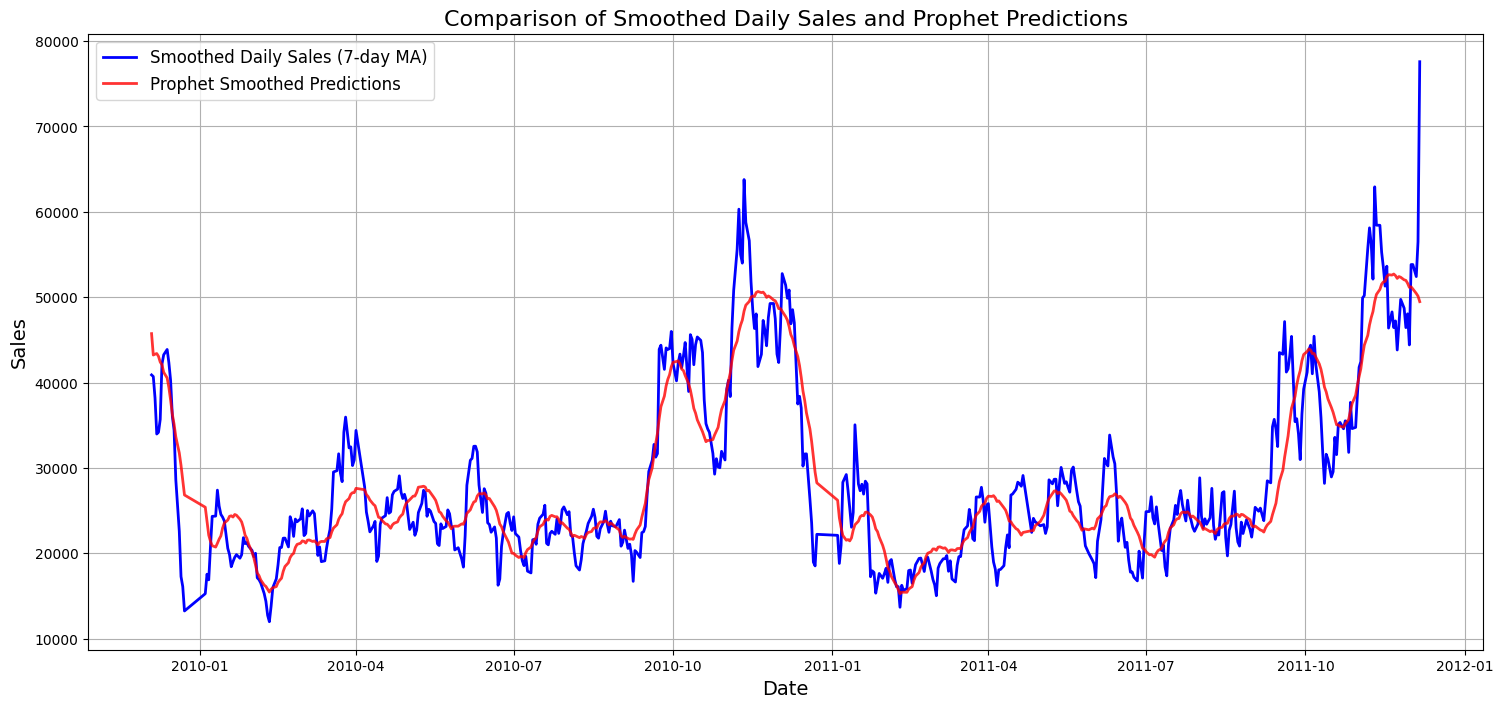

MAPE: 12.54%


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

forecast_existing = prophet_model.predict(daily_sales_uk)

# apply additional smoothing to Prophet's predicted values using a moving average
forecast_existing['yhat_smooth'] = forecast_existing['yhat'].rolling(window=7, min_periods=1).mean()

actual_values = daily_sales_uk['y'].values
predicted_values = forecast_existing['yhat_smooth'].iloc[:len(actual_values)].values  # Align lengths

mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

plt.figure(figsize=(18,8))
plt.plot(daily_sales_uk['ds'], daily_sales_uk['y'], linestyle='-', label="Smoothed Daily Sales (7-day MA)", color='b', linewidth=2)
plt.plot(forecast_existing['ds'], forecast_existing['yhat_smooth'], linestyle='-', label="Prophet Smoothed Predictions", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Comparison of Smoothed Daily Sales and Prophet Predictions", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Step 5: Display MAPE value
print(f"MAPE: {mape:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/dcadqggi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/e1yiqtf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94400', 'data', 'file=/tmp/tmpfzigd_5r/dcadqggi.json', 'init=/tmp/tmpfzigd_5r/e1yiqtf1.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modely0f754l8/prophet_model-20250303003619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training Data: (358, 2)
Validation Data: (119, 2)
Testing Data: (121, 2)
MAPE (Mean Absolute Percentage Error) on Test Data: 44.71%


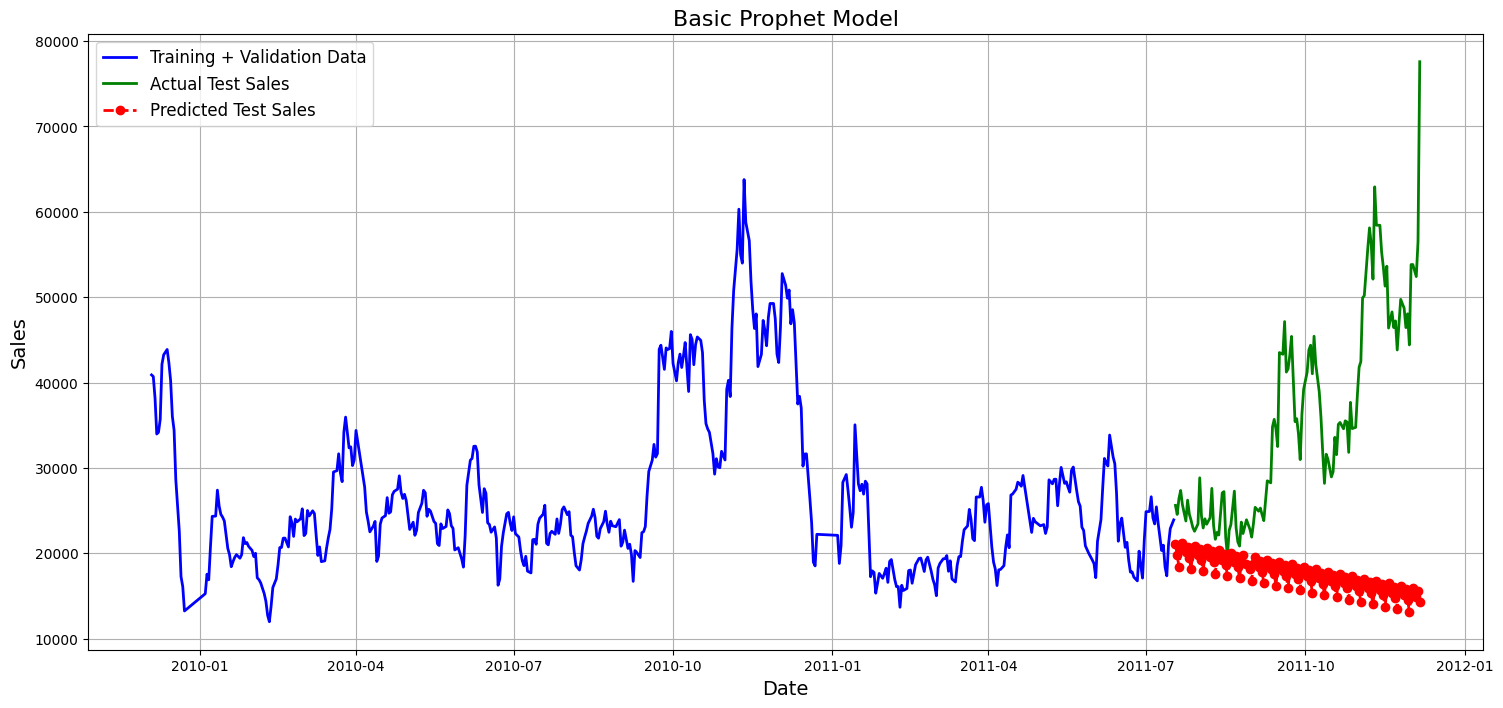

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# ✅ Step 1: Train-Validation-Test Split (60%-20%-20%)
train_size = int(len(daily_sales_uk) * 0.6)
val_size = int(len(daily_sales_uk) * 0.2)

train_data = daily_sales_uk.iloc[:train_size].copy()
val_data = daily_sales_uk.iloc[train_size:train_size + val_size].copy()
test_data = daily_sales_uk.iloc[train_size + val_size:].copy()

print(f"Training Data: {train_data.shape}")
print(f"Validation Data: {val_data.shape}")
print(f"Testing Data: {test_data.shape}")

# prepare data for Prophet
train_data = train_data.reset_index().rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})
val_data = val_data.reset_index().rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})
test_data = test_data.reset_index().rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})

# train Prophet on Train + Validation Before Testing
final_train_data = pd.concat([train_data, val_data])

prophet_model = Prophet(daily_seasonality=True)  # No tuning, no holidays
prophet_model.fit(final_train_data)

future_dates = test_data[['ds']]  # Only use dates for prediction
forecast = prophet_model.predict(future_dates)

# MAPE
mape_test = mean_absolute_percentage_error(test_data['y'], forecast['yhat']) * 100
print(f"MAPE (Mean Absolute Percentage Error) on Test Data: {mape_test:.2f}%")

plt.figure(figsize=(18,8))
plt.plot(final_train_data['ds'], final_train_data['y'], linestyle='-', label="Training + Validation Data", color='blue', linewidth=2)
plt.plot(test_data['ds'], test_data['y'], linestyle='-', label="Actual Test Sales", color='g', linewidth=2)
plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', marker='o', label="Predicted Test Sales", color='r', linewidth=2)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Basic Prophet Model", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/aodgmq51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/tmxbk4og.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30545', 'data', 'file=/tmp/tmpfzigd_5r/aodgmq51.json', 'init=/tmp/tmpfzigd_5r/tmxbk4og.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modelwrsudqgk/prophet_model-20250303003620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training Data: (358, 2)
Validation Data: (119, 2)
Testing Data: (121, 2)


00:36:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE (Mean Absolute Percentage Error) on Test Data: 18.44%


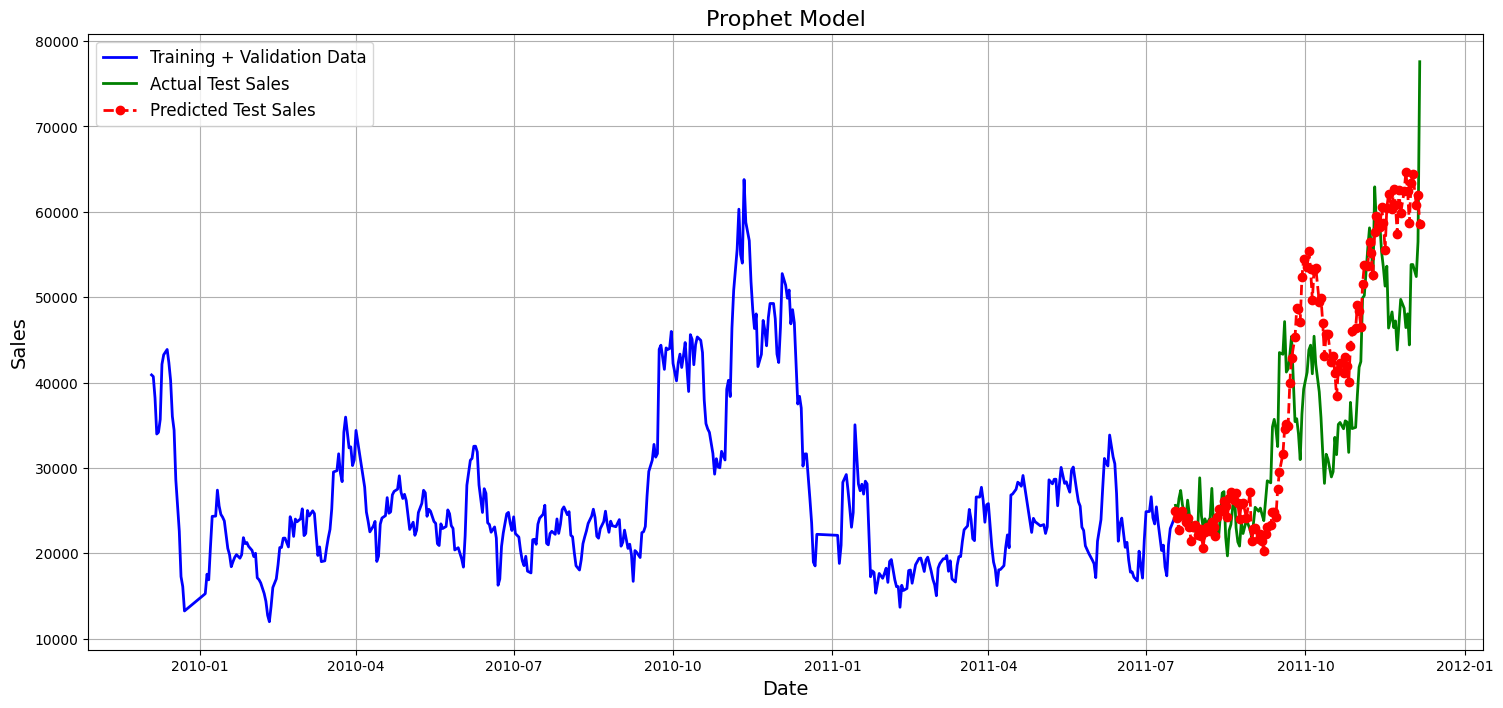

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# ✅ Step 1: Train-Validation-Test Split (60%-20%-20%)
train_size = int(len(daily_sales_uk) * 0.6)
val_size = int(len(daily_sales_uk) * 0.2)

train_data1 = daily_sales_uk.iloc[:train_size].copy()
val_data1 = daily_sales_uk.iloc[train_size:train_size + val_size].copy()
test_data1 = daily_sales_uk.iloc[train_size + val_size:].copy()

print(f"Training Data: {train_data1.shape}")
print(f"Validation Data: {val_data1.shape}")
print(f"Testing Data: {test_data1.shape}")

train_data1 = train_data1.reset_index().rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})
val_data1 = val_data1.reset_index().rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})
test_data1 = test_data1.reset_index().rename(columns={'InvoiceDate': 'ds', 'Sales': 'y'})

# Apply Log Transformation
train_data1['y'] = np.log1p(train_data1['y'])
val_data1['y'] = np.log1p(val_data1['y'])
test_data1['y'] = np.log1p(test_data1['y'])

# Add UK Holidays
uk_holidays = pd.DataFrame({
    'holiday': ['New Year', 'Good Friday', 'Easter Monday', 'Early May Bank Holiday',
                'Spring Bank Holiday', 'Summer Bank Holiday', 'Christmas Day', 'Boxing Day', 'Black Friday'] * 2,
    'ds': pd.to_datetime(['2010-01-01', '2010-04-02', '2010-04-05', '2010-05-03', '2010-05-31', '2010-08-30',
                          '2010-12-25', '2010-12-26', '2010-11-26',
                          '2011-01-01', '2011-04-22', '2011-04-25', '2011-05-02', '2011-05-30', '2011-08-29',
                          '2011-12-25', '2011-12-26', '2011-11-25']),
    'lower_window': [0] * 18,
    'upper_window': [1] * 18
})

# Add Weekday Regressor
train_data1['weekday'] = train_data1['ds'].dt.weekday
val_data1['weekday'] = val_data1['ds'].dt.weekday
test_data1['weekday'] = test_data1['ds'].dt.weekday

final_train_data = pd.concat([train_data1, val_data1])  #  Now using both train and validation!

prophet_model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=uk_holidays
)
prophet_model.add_regressor('weekday')
prophet_model.fit(final_train_data)

future_dates1 = test_data1[['ds', 'weekday']].copy()
forecast1 = prophet_model.predict(future_dates1)

# Reverse Log Transformation
forecast1['yhat'] = np.expm1(forecast1['yhat'])
test_data1['y'] = np.expm1(test_data1['y'])

mape_test = mean_absolute_percentage_error(test_data1['y'], forecast1['yhat']) * 100
print(f"MAPE (Mean Absolute Percentage Error) on Test Data: {mape_test:.2f}%")

plt.figure(figsize=(18,8))
plt.plot(final_train_data['ds'], np.expm1(final_train_data['y']), linestyle='-', label="Training + Validation Data", color='blue', linewidth=2)
plt.plot(test_data1['ds'], test_data1['y'], linestyle='-', label="Actual Test Sales", color='g', linewidth=2)
plt.plot(forecast1['ds'], forecast1['yhat'], linestyle='--', marker='o', label="Predicted Test Sales", color='r', linewidth=2)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Prophet Model", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/vkh24jkn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/9qd4ihcg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40917', 'data', 'file=/tmp/tmpfzigd_5r/vkh24jkn.json', 'init=/tmp/tmpfzigd_5r/9qd4ihcg.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modeleytc1ptq/prophet_model-20250303003620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


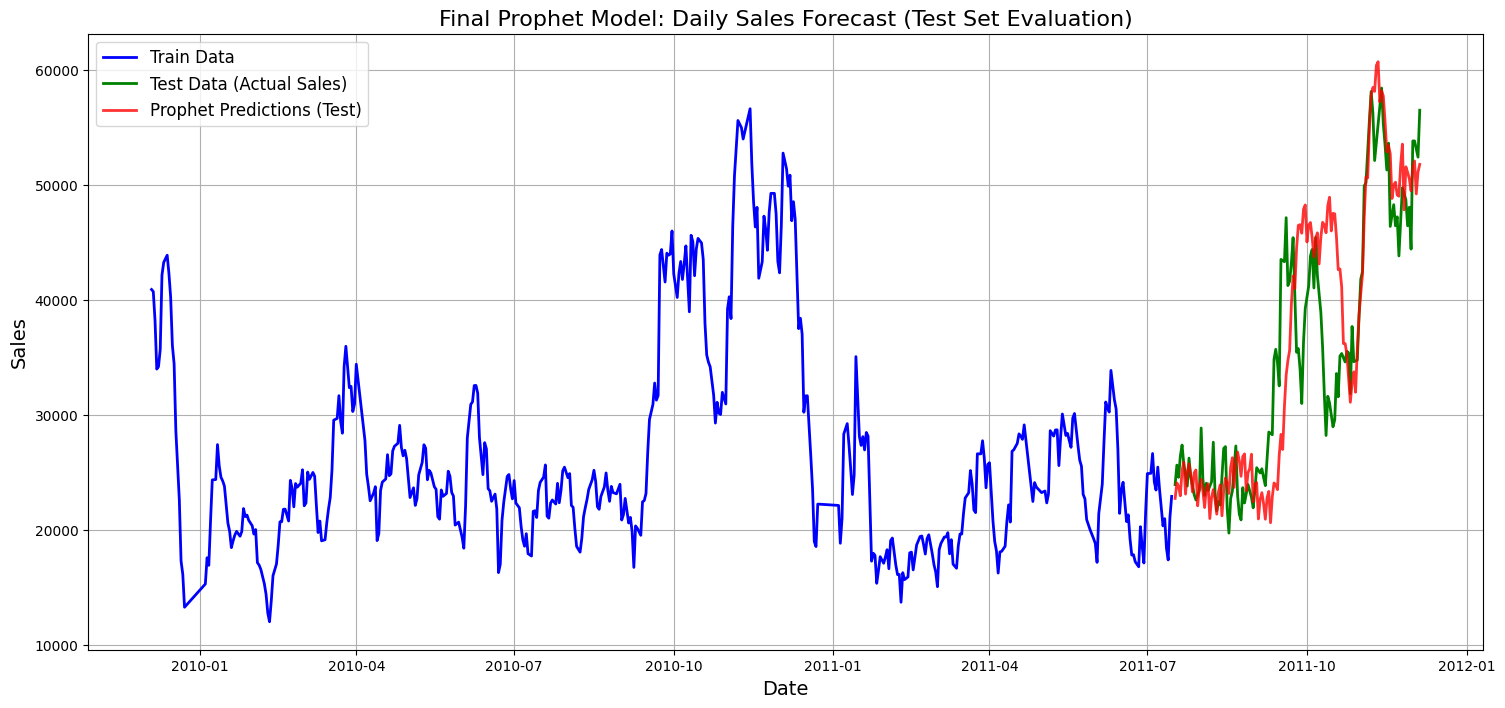

Final MAPE on Test Set: 13.33%


In [62]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dataset is sorted
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# Remove extreme outliers (top 1% highest sales)
threshold = daily_sales_uk["y"].quantile(0.99)
daily_sales_uk = daily_sales_uk[daily_sales_uk["y"] < threshold]

# Define carrying capacity, floor
daily_sales_uk.loc[:, "cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk.loc[:, "floor"] = 0

split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

uk_holidays = pd.DataFrame({
    "holiday": [
        "New Year", "Good Friday", "Easter Monday", "Early May Bank Holiday",
        "Spring Bank Holiday", "Summer Bank Holiday", "Christmas Day",
        "Boxing Day", "Black Friday"
    ] * 2,  # Extend for 2 years
    "ds": pd.to_datetime([
        "2010-01-01", "2010-04-02", "2010-04-05", "2010-05-03", "2010-05-31",
        "2010-08-30", "2010-12-25", "2010-12-26", "2010-11-26",
        "2011-01-01", "2011-04-22", "2011-04-25", "2011-05-02", "2011-05-30",
        "2011-08-29", "2011-12-25", "2011-12-26", "2011-11-25"
    ]),
    "lower_window": [0] * 18,
    "upper_window": [1] * 18
})

general_holidays = pd.DataFrame({
    "holiday": "holiday",
    "ds": pd.to_datetime([
        "2009-12-25", "2010-12-25", "2011-12-25",  # Christmas
        "2010-11-26", "2011-11-25",  # Black Friday
        "2010-07-04", "2011-07-04",
        "2010-01-01", "2011-01-01"
    ]),
    "lower_window": -2,
    "upper_window": 2
})

all_holidays = pd.concat([uk_holidays, general_holidays])

# Final Prophet Model
prophet_model = Prophet(
    growth="logistic",
    seasonality_mode="additive",
    daily_seasonality=True,
    yearly_seasonality=20,
    weekly_seasonality=10,
    changepoint_prior_scale=0.2,
    holidays=all_holidays  # Include all holidays
)

# Fit the model on the training set
prophet_model.fit(train)

future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(),
                                           end=test["ds"].max(), freq='D')})
future["cap"] = train["cap"].max()
future["floor"] = 0

forecast_test = prophet_model.predict(future)

# MAPE
actual_values = test.set_index("ds")["y"]
predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Plot Actual vs Predicted Sales (Final Optimized Model)
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat'], linestyle='-', label="Prophet Predictions (Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Final Prophet Model: Daily Sales Forecast (Test Set Evaluation)", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

print(f"Final MAPE on Test Set: {mape:.2f}%")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


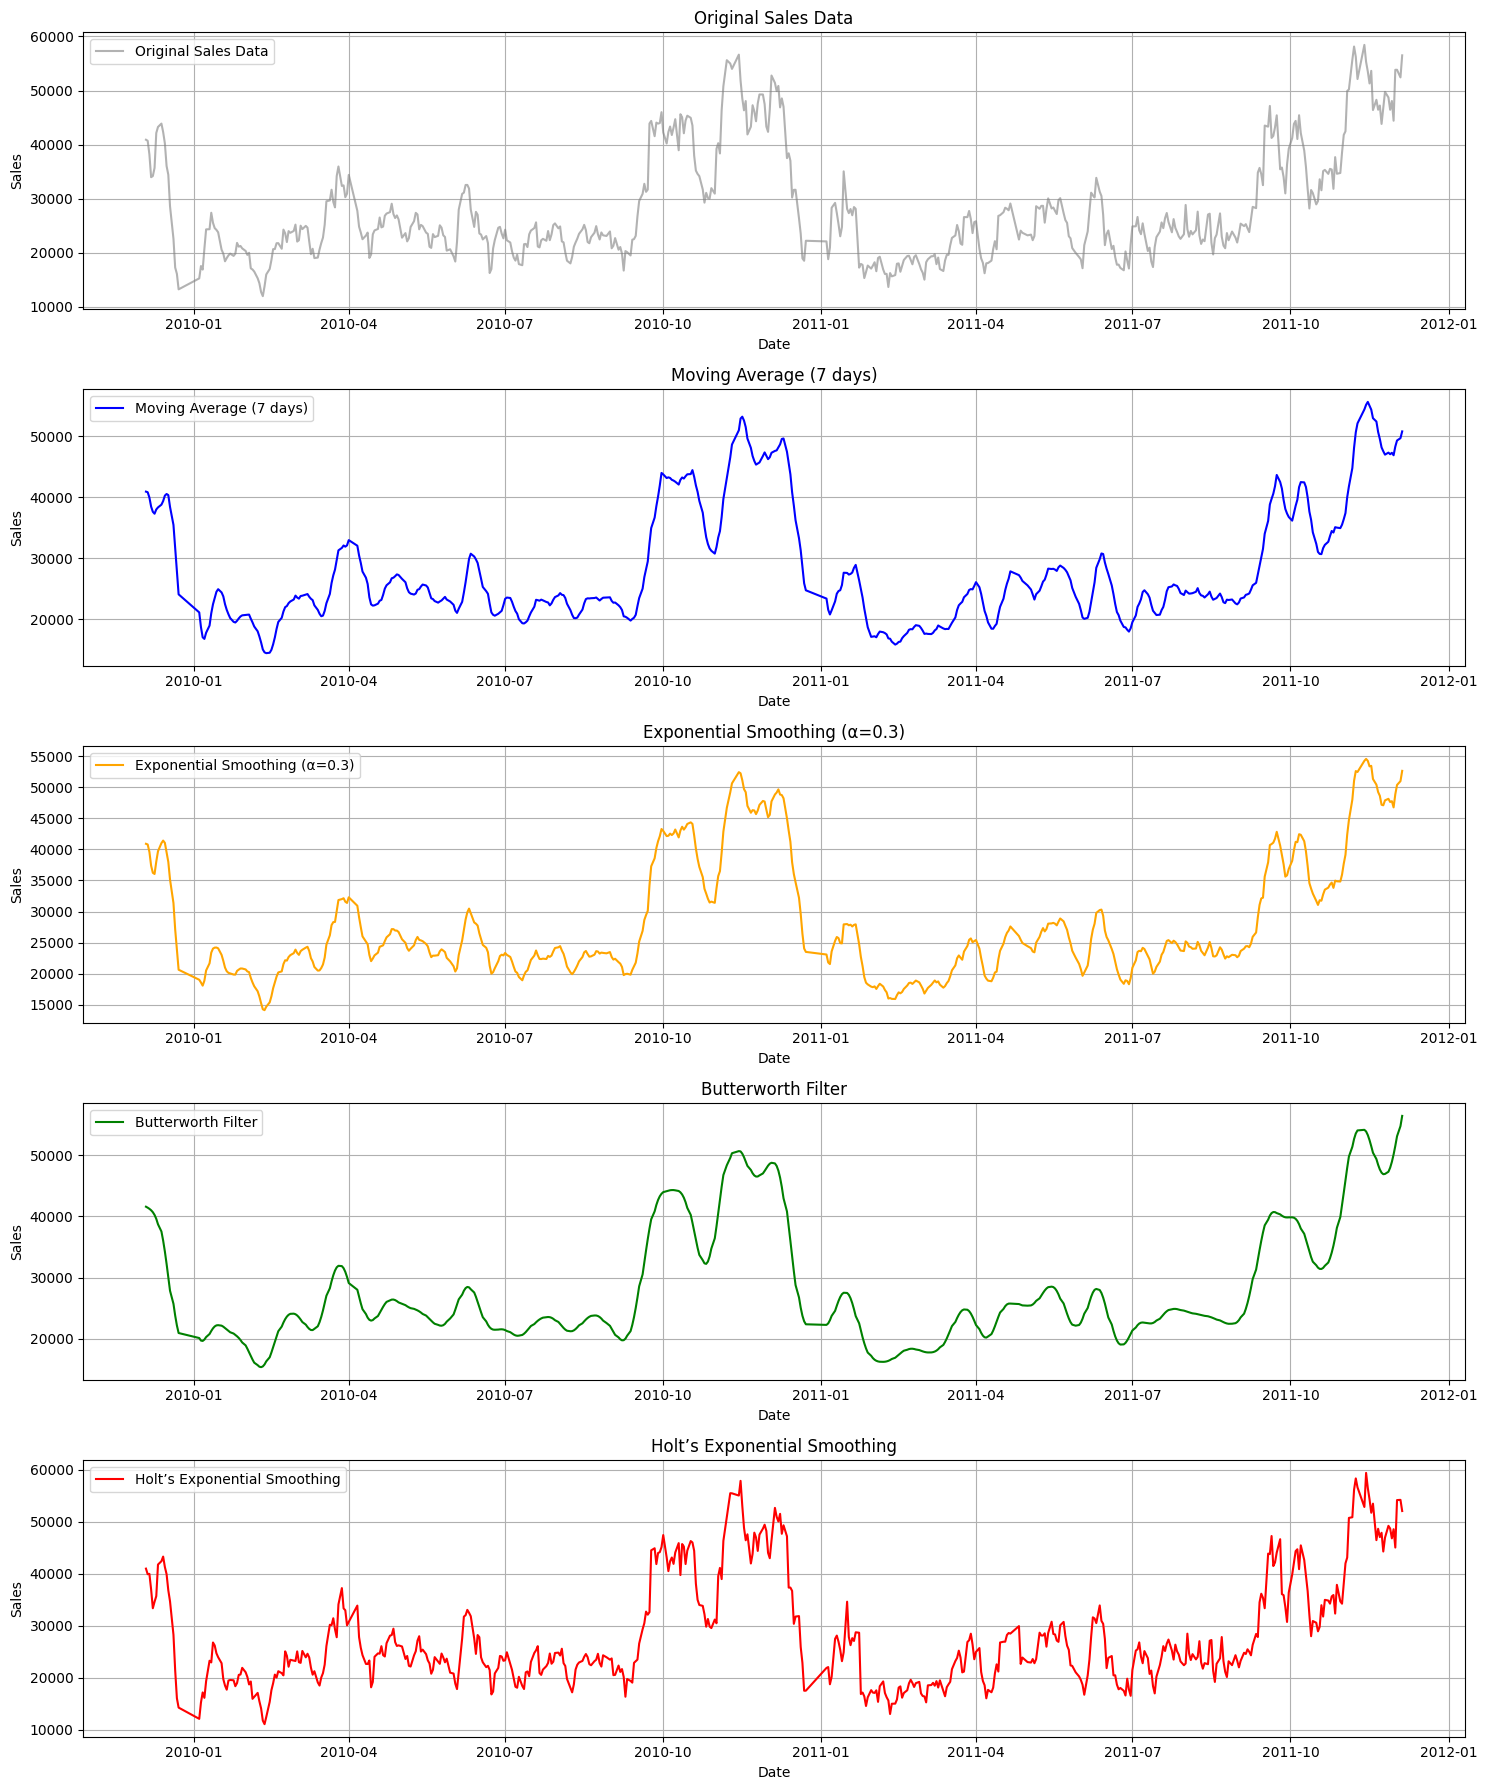

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your daily sales data (Ensure 'InvoiceDate' is a datetime column)
daily_sales_uk['ds'] = pd.to_datetime(daily_sales_uk['ds'])
daily_sales_uk = daily_sales_uk.sort_values('ds')

# Create separate plots for each smoothing technique

# Plot Original Sales Data
plt.figure(figsize=(15, 18))
plt.subplot(5, 1, 1)
plt.plot(daily_sales_uk['ds'], daily_sales_uk['y'], label="Original Sales Data", color='gray', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Original Sales Data")
plt.grid()
plt.legend()

# Moving Average (MA) Filter (Window = 7 days)
plt.subplot(5, 1, 2)
window_size = 7
daily_sales_uk['MA_Sales'] = daily_sales_uk['y'].rolling(window=window_size, min_periods=1).mean()
plt.plot(daily_sales_uk['ds'], daily_sales_uk['MA_Sales'], label="Moving Average (7 days)", color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Moving Average (7 days)")
plt.grid()
plt.legend()

# Exponential Smoothing (Alpha = 0.3)
plt.subplot(5, 1, 3)
alpha = 0.3
daily_sales_uk['Exp_Smooth_Sales'] = daily_sales_uk['y'].ewm(alpha=alpha).mean()
plt.plot(daily_sales_uk['ds'], daily_sales_uk['Exp_Smooth_Sales'], label="Exponential Smoothing (α=0.3)", color='orange')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Exponential Smoothing (α=0.3)")
plt.grid()
plt.legend()

# Butterworth Filter
def butterworth_filter(data, cutoff=0.1, order=3):
    b, a = butter(order, cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

plt.subplot(5, 1, 4)
daily_sales_uk['Butter_Sales'] = butterworth_filter(daily_sales_uk['y'])
plt.plot(daily_sales_uk['ds'], daily_sales_uk['Butter_Sales'], label="Butterworth Filter", color='green')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Butterworth Filter")
plt.grid()
plt.legend()

# Holt’s Exponential Smoothing Model
plt.subplot(5, 1, 5)
holt_model = ExponentialSmoothing(
    daily_sales_uk['y'],
    trend='add',
    seasonal='add',
    seasonal_periods=7  # Specify the number of periods in a season (e.g., for yearly seasonality)
).fit()
daily_sales_uk['Holt_Sales'] = holt_model.fittedvalues
plt.plot(daily_sales_uk['ds'], daily_sales_uk['Holt_Sales'], label="Holt’s Exponential Smoothing", color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Holt’s Exponential Smoothing")
plt.grid()
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/bv5yvm33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/9hnqa5at.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86495', 'data', 'file=/tmp/tmpfzigd_5r/bv5yvm33.json', 'init=/tmp/tmpfzigd_5r/9hnqa5at.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_model7e7svbz5/prophet_model-20250303003623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


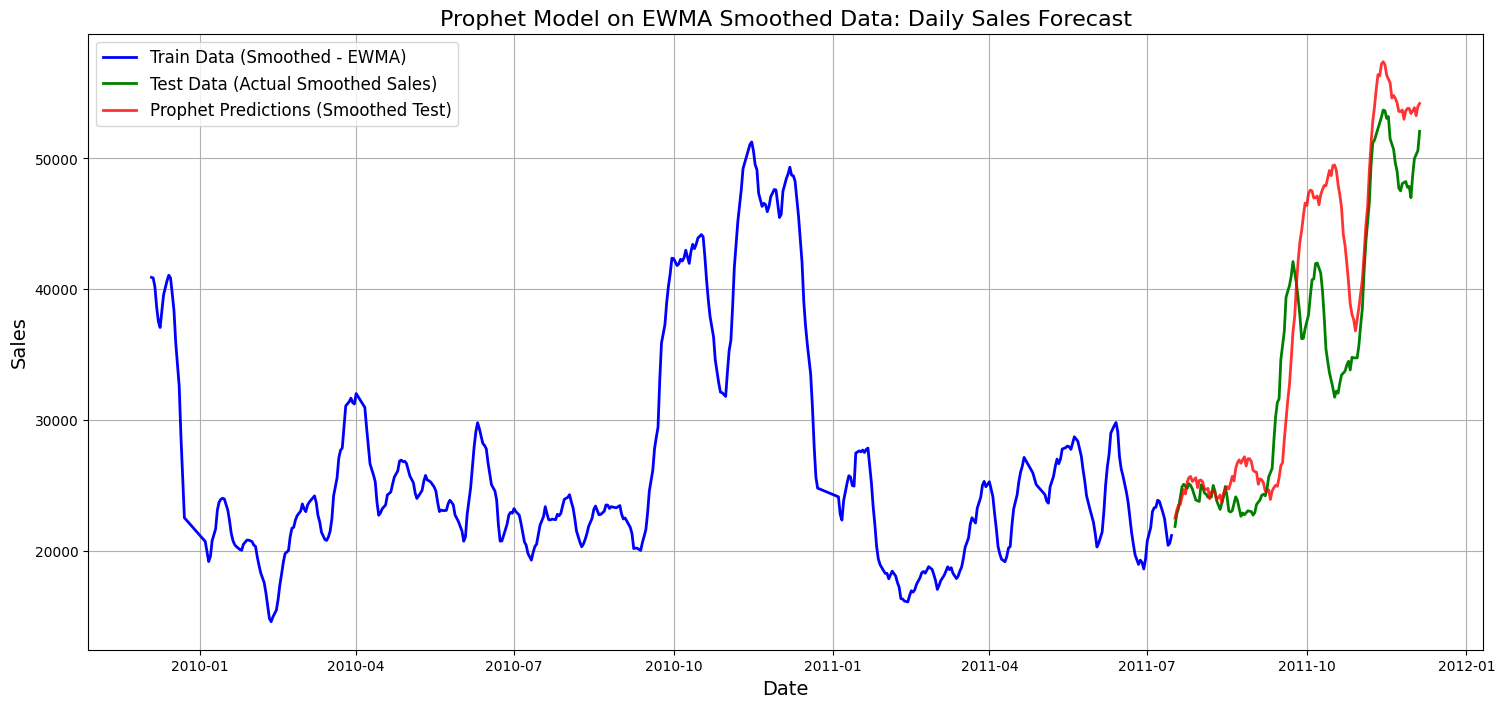

Final MAPE on Smoothed Test Set (EWMA): 12.65% (Target < 10%)


In [64]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dataset is sorted
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# Apply EWMA (Exponentially Weighted Moving Average) for smoothing
daily_sales_uk["y_smooth"] = daily_sales_uk["y"].ewm(span=7, adjust=False).mean()

# Use smoothed data instead of raw data
daily_sales_uk["y"] = daily_sales_uk["y_smooth"]

# Define carrying capacity (cap) and floor
daily_sales_uk.loc[:, "cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk.loc[:, "floor"] = 0

# Split into 80% train and 20% test
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# Define FBProphet Model
prophet_model = Prophet(
    growth="logistic",
    seasonality_mode="additive",
    daily_seasonality=True,
    yearly_seasonality=20,
    weekly_seasonality=10,
    changepoint_prior_scale=0.2,
    interval_width=0.98
)

# Fit the model on smoothed training data
prophet_model.fit(train)

# Create Future DataFrame for Predictions
future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
future["cap"] = train["cap"].max()
future["floor"] = 0

# Generate Predictions
forecast_test = prophet_model.predict(future)

# Compute MAPE
actual_values = test.set_index("ds")["y"]
predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Plot Actual vs Predicted Sales (Smoothed Model)
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data (Smoothed - EWMA)", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Smoothed Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat'], linestyle='-', label="Prophet Predictions (Smoothed Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Prophet Model on EWMA Smoothed Data: Daily Sales Forecast", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Display Final MAPE
print(f"Final MAPE on Smoothed Test Set (EWMA): {mape:.2f}% (Target < 10%)")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/c7zuflzx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/4waoyp3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77', 'data', 'file=/tmp/tmpfzigd_5r/c7zuflzx.json', 'init=/tmp/tmpfzigd_5r/4waoyp3g.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modelksbrd4vd/prophet_model-20250303003624.csv', 'method=optimize', 'algorithm=lbfgs', 'it

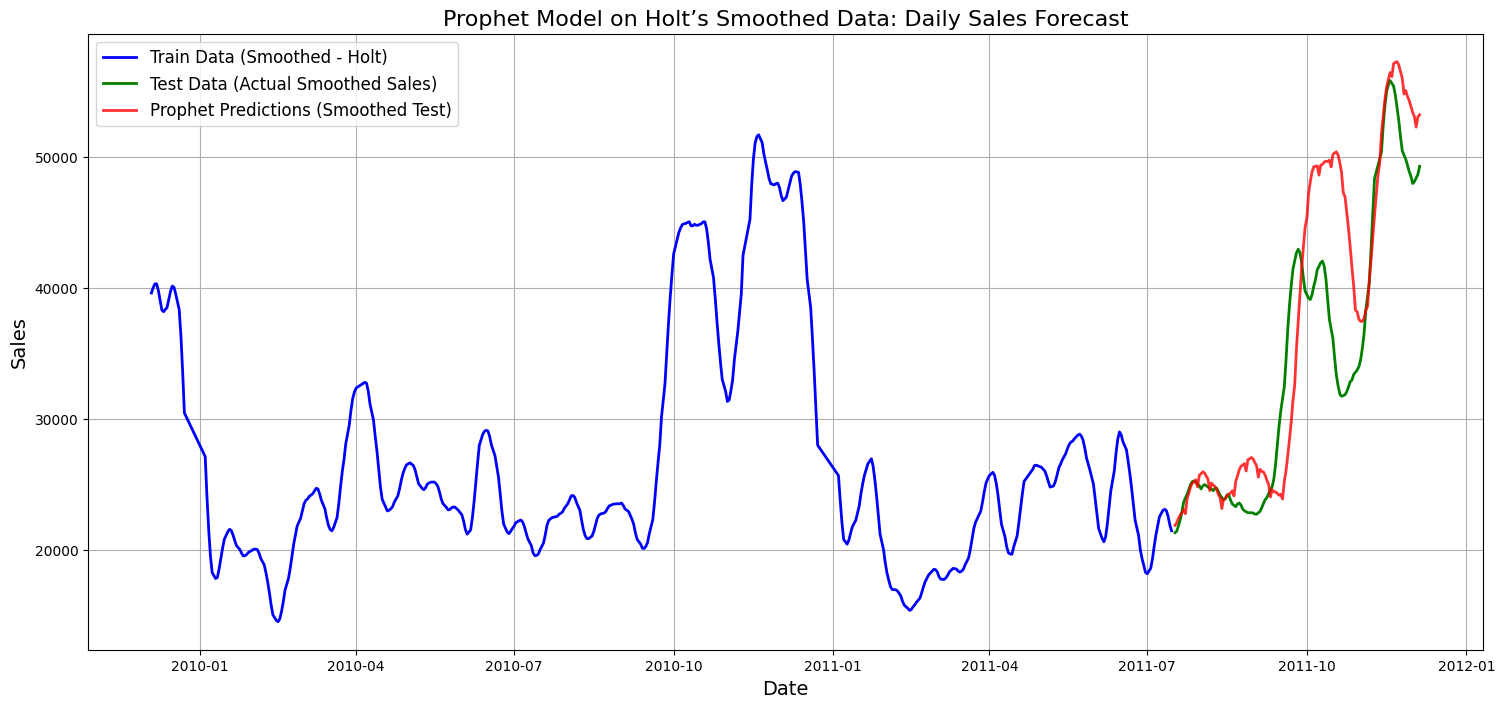

Final MAPE on Smoothed Test Set (Holt's): 12.53% (Target < 10%)


In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure dataset is sorted
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# Apply Holt's Exponential Smoothing for smoothing
model = ExponentialSmoothing(daily_sales_uk["y"], trend="add", seasonal=None, damped_trend=True)
fit = model.fit(smoothing_level=0.3, smoothing_trend=0.1)
daily_sales_uk["y_smooth"] = fit.fittedvalues

# Use smoothed data instead of raw data
daily_sales_uk["y"] = daily_sales_uk["y_smooth"]

# Define carrying capacity (cap) and floor
daily_sales_uk.loc[:, "cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk.loc[:, "floor"] = 0

# Split into 80% train and 20% test
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# Define FBProphet Model
prophet_model = Prophet(
    growth="logistic",
    seasonality_mode="additive",
    daily_seasonality=True,
    yearly_seasonality=20,
    weekly_seasonality=10,
    changepoint_prior_scale=0.2,
    interval_width=0.98
)

# Fit the model on smoothed training data
prophet_model.fit(train)

# Create Future DataFrame for Predictions
future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
future["cap"] = train["cap"].max()
future["floor"] = 0

# Generate Predictions
forecast_test = prophet_model.predict(future)

# Compute MAPE
actual_values = test.set_index("ds")["y"]
predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Plot Actual vs Predicted Sales (Smoothed Model)
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data (Smoothed - Holt)", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Smoothed Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat'], linestyle='-', label="Prophet Predictions (Smoothed Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Prophet Model on Holt’s Smoothed Data: Daily Sales Forecast", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Display Final MAPE
print(f"Final MAPE on Smoothed Test Set (Holt's): {mape:.2f}% (Target < 10%)")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/3_pthyy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/48u3psi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27310', 'data', 'file=/tmp/tmpfzigd_5r/3_pthyy_.json', 'init=/tmp/tmpfzigd_5r/48u3psi6.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_model_6vm7hng/prophet_model-20250303003626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


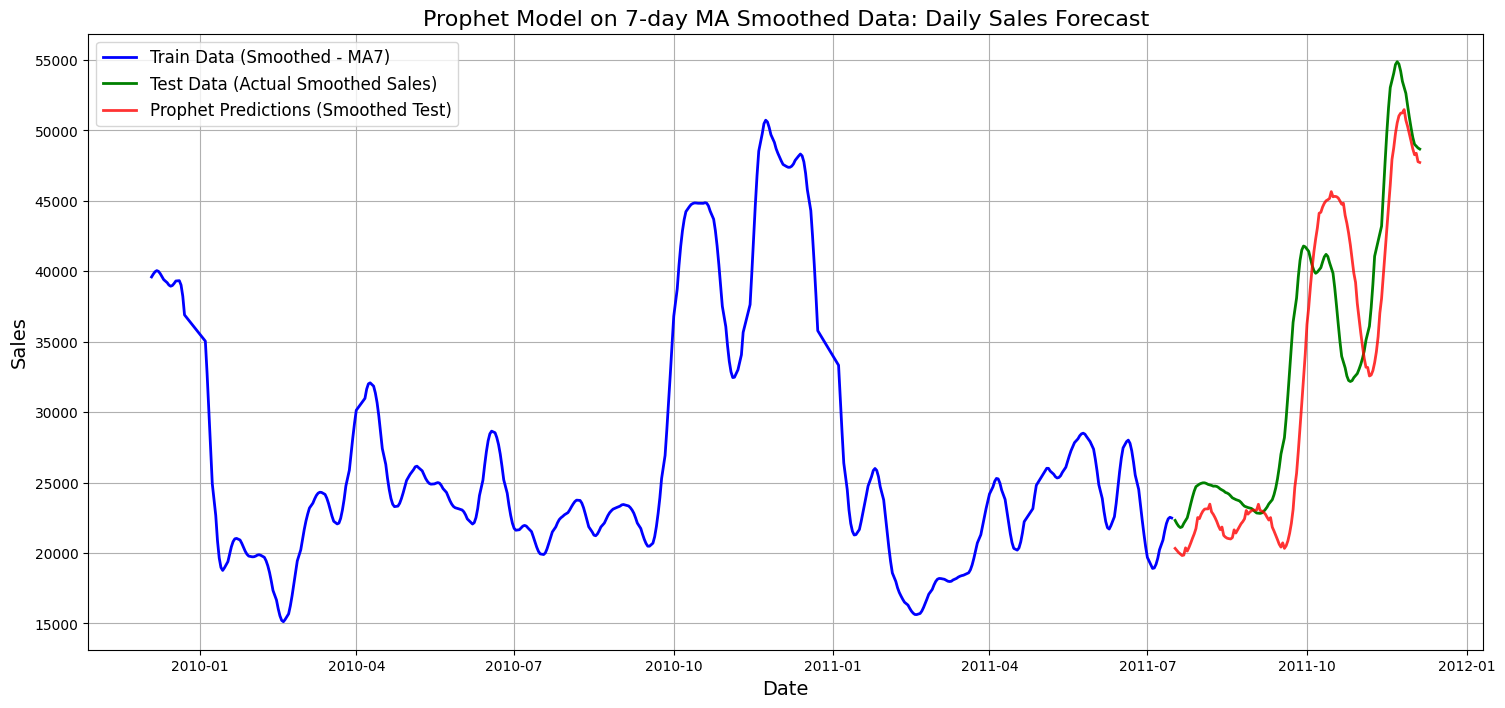

Final MAPE on Smoothed Test Set (MA7): 12.29% (Target < 10%)


In [66]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dataset is sorted
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# Apply 7-day Moving Average for smoothing
daily_sales_uk["y_smooth"] = daily_sales_uk["y"].rolling(window=7, min_periods=1).mean()

# Use smoothed data instead of raw data
daily_sales_uk["y"] = daily_sales_uk["y_smooth"]

# Define carrying capacity (cap) and floor
daily_sales_uk.loc[:, "cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk.loc[:, "floor"] = 0

# Split into 80% train and 20% test
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# Define FBProphet Model
prophet_model = Prophet(
    seasonality_mode="additive",
    daily_seasonality=True,
    yearly_seasonality=20,
    weekly_seasonality=10,
    changepoint_prior_scale=0.2,
)

# Fit the model on smoothed training data
prophet_model.fit(train)

# Create Future DataFrame for Predictions
future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
future["cap"] = train["cap"].max()
future["floor"] = 0

# Generate Predictions
forecast_test = prophet_model.predict(future)

# Compute MAPE
actual_values = test.set_index("ds")["y"]
predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Plot Actual vs Predicted Sales (Smoothed Model)
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data (Smoothed - MA7)", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Smoothed Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat'], linestyle='-', label="Prophet Predictions (Smoothed Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Prophet Model on 7-day MA Smoothed Data: Daily Sales Forecast", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# Display Final MAPE
print(f"Final MAPE on Smoothed Test Set (MA7): {mape:.2f}% (Target < 10%)")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/i6ppj4s3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/iy1j881r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6789', 'data', 'file=/tmp/tmpfzigd_5r/i6ppj4s3.json', 'init=/tmp/tmpfzigd_5r/iy1j881r.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modelke_7ogdj/prophet_model-20250303003627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-67-7876def32a1b>:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errors.iloc[i*region_si

MAPE for Region 1: 7.43%
MAPE for Region 2: 6.94%
MAPE for Region 3: 20.49%
MAPE for Region 4: 11.63%
Overall MAPE on Smoothed Test Set (MA7): 11.62% (Target < 10%)


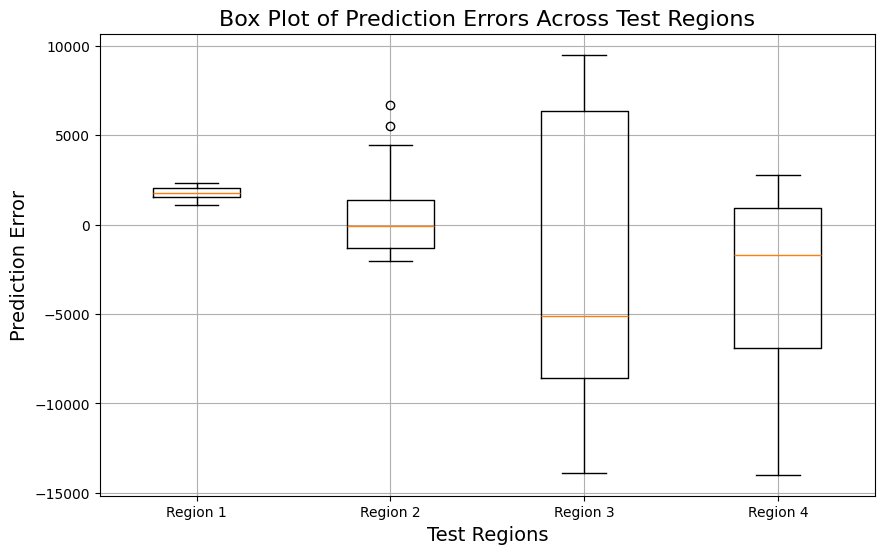

In [67]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error

# Ensure dataset is sorted
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# Apply 7-day Moving Average for smoothing
daily_sales_uk["y_smooth"] = daily_sales_uk["y"].rolling(window=7, min_periods=1).mean()

# Use smoothed data instead of raw data
daily_sales_uk["y"] = daily_sales_uk["y_smooth"]

# Define carrying capacity (cap) and floor
daily_sales_uk.loc[:, "cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk.loc[:, "floor"] = 0

# Split into 80% train and 20% test
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# Define FBProphet Model
prophet_model = Prophet(
    seasonality_mode="additive",
    daily_seasonality=True,
    yearly_seasonality=20,
    weekly_seasonality=10,
    changepoint_prior_scale=0.2,
)

# Fit the model on smoothed training data
prophet_model.fit(train)

# Create Future DataFrame for Predictions
future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
future["cap"] = train["cap"].max()
future["floor"] = 0

# Generate Predictions
forecast_test = prophet_model.predict(future)

# Compute MAPE for different test regions
num_regions = 4  # Define number of regions
region_size = len(test) // num_regions
mape_values = []

for i in range(num_regions):
    start_idx = i * region_size
    end_idx = (i + 1) * region_size if i < num_regions - 1 else len(test)

    actual_values = test.iloc[start_idx:end_idx].set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]

    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
    mape_values.append(mape)
    print(f"MAPE for Region {i + 1}: {mape:.2f}%")

# Compute overall MAPE
overall_mape = mean_absolute_percentage_error(test.set_index("ds")["y"],
                                              forecast_test.set_index("ds").loc[test["ds"], "yhat"]) * 100
print(f"Overall MAPE on Smoothed Test Set (MA7): {overall_mape:.2f}% (Target < 10%)")

# Generate Box Plot of Errors
errors = test.set_index("ds")["y"] - forecast_test.set_index("ds").loc[test["ds"], "yhat"]

plt.figure(figsize=(10,6))
plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],
            labels=[f"Region {i+1}" for i in range(num_regions)])
plt.xlabel("Test Regions", fontsize=14)
plt.ylabel("Prediction Error", fontsize=14)
plt.title("Box Plot of Prediction Errors Across Test Regions", fontsize=16)
plt.grid()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/wl4op0q7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/6lzcqwep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17452', 'data', 'file=/tmp/tmpfzigd_5r/wl4op0q7.json', 'init=/tmp/tmpfzigd_5r/6lzcqwep.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_model9elqmu0g/prophet_model-20250303003628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/tzuezj0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/gg8pf2lz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best Hyperparameters: Changepoint Prior Scale = 0.15, Seasonality Mode = additive
Best MAPE: 10.21%
MAPE for Region 1: 5.19%
MAPE for Region 2: 4.37%
MAPE for Region 3: 16.60%
MAPE for Region 4: 14.40%
Overall MAPE on Smoothed Test Set (MA7): 10.21% (Target < 10%)


<ipython-input-68-324d2da8772f>:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],


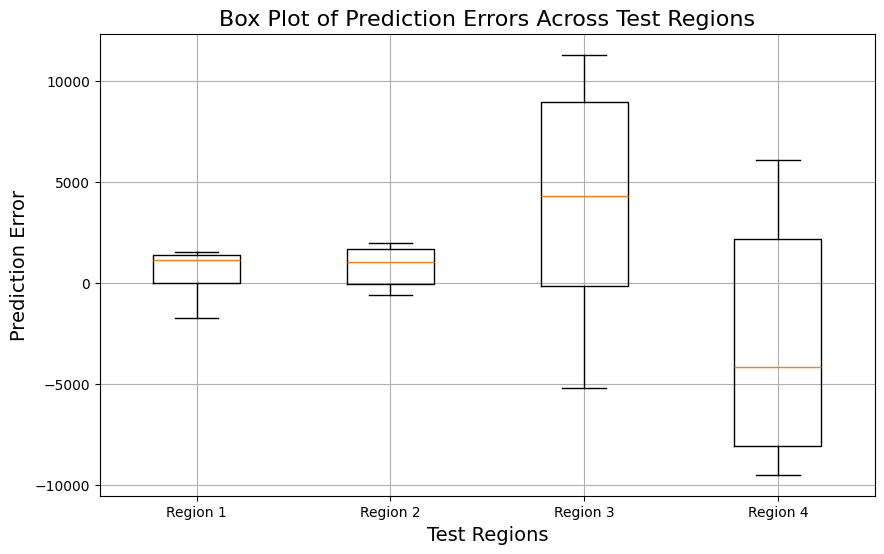

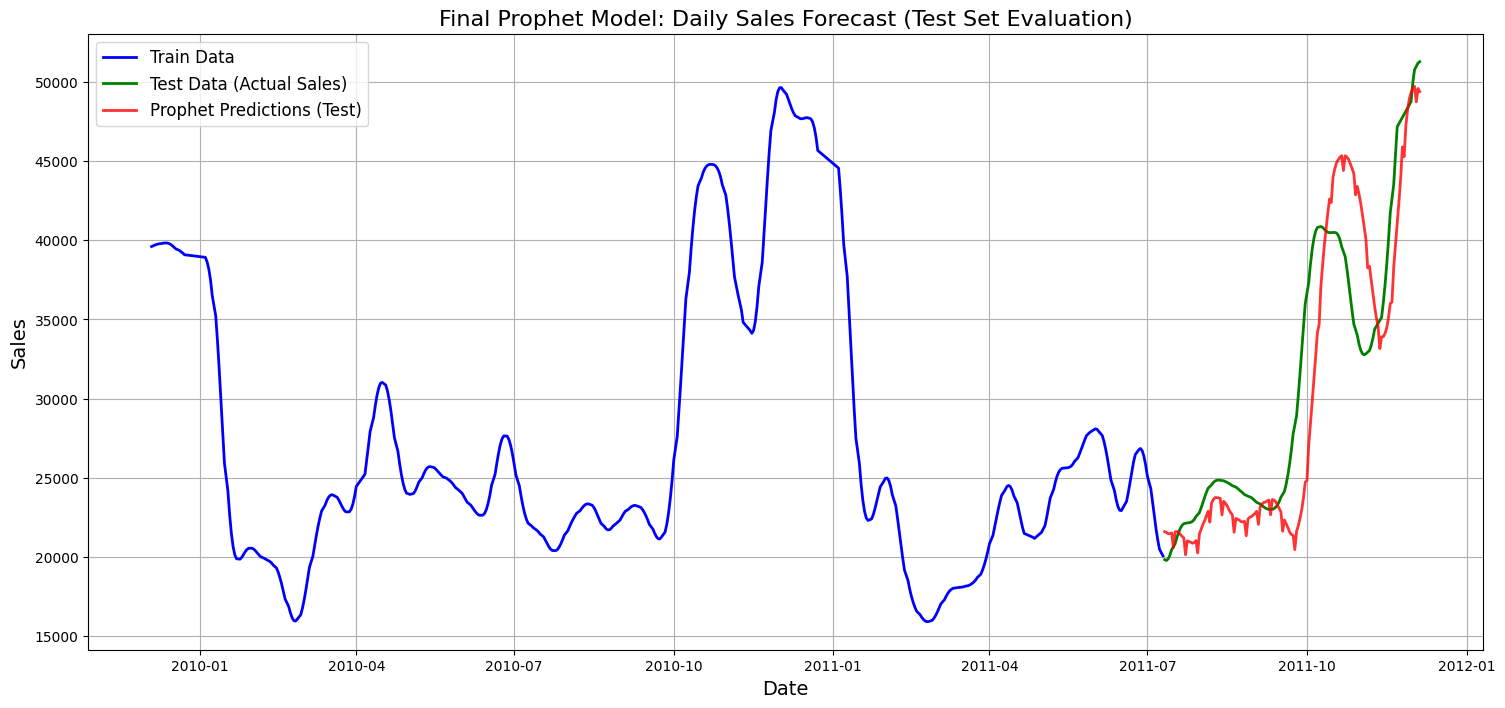

In [68]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
from itertools import product

# Ensure dataset is sorted
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# Remove extreme outliers (top 1% highest sales)
threshold = daily_sales_uk["y"].quantile(0.99)
daily_sales_uk = daily_sales_uk[daily_sales_uk["y"] < threshold]

# Apply 7-day Moving Average for smoothing
daily_sales_uk["y_smooth"] = daily_sales_uk["y"].rolling(window=7, min_periods=1).mean()

# Use smoothed data instead of raw data
daily_sales_uk["y"] = daily_sales_uk["y_smooth"]

# Define carrying capacity and floor
daily_sales_uk["cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk["floor"] = 0

# Split into 80% train and 20% test
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# Define UK and general holidays
uk_holidays = pd.DataFrame({
    "holiday": [
        "New Year", "Good Friday", "Easter Monday", "Early May Bank Holiday",
        "Spring Bank Holiday", "Summer Bank Holiday", "Christmas Day",
        "Boxing Day", "Black Friday"
    ] * 2,
    "ds": pd.to_datetime([
        "2010-01-01", "2010-04-02", "2010-04-05", "2010-05-03", "2010-05-31",
        "2010-08-30", "2010-12-25", "2010-12-26", "2010-11-26",
        "2011-01-01", "2011-04-22", "2011-04-25", "2011-05-02", "2011-05-30",
        "2011-08-29", "2011-12-25", "2011-12-26", "2011-11-25"
    ]),
    "lower_window": [0] * 18,
    "upper_window": [1] * 18
})

general_holidays = pd.DataFrame({
    "holiday": "holiday",
    "ds": pd.to_datetime([
        "2009-12-25", "2010-12-25", "2011-12-25",
        "2010-11-26", "2011-11-25",
        "2010-07-04", "2011-07-04",
        "2010-01-01", "2011-01-01"
    ]),
    "lower_window": -2,
    "upper_window": 2
})

all_holidays = pd.concat([uk_holidays, general_holidays])

# Hyperparameter tuning grid
param_grid = {
    "changepoint_prior_scale": [0.1, 0.15, 0.2],
    "seasonality_mode": ["additive", "multiplicative"],
}

# Generate all combinations of hyperparameters
param_combinations = list(product(*param_grid.values()))
best_mape = float("inf")
best_params = None
best_model = None

# Hyperparameter tuning loop
for params in param_combinations:
    prophet_model = Prophet(
        growth="logistic",
        changepoint_prior_scale=params[0],
        seasonality_mode=params[1],
        daily_seasonality=True,
        yearly_seasonality=20,
        weekly_seasonality=10,
        holidays=all_holidays
    )

    # Fit the model
    prophet_model.fit(train)

    # Forecast
    future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
    future["cap"] = train["cap"].max()
    future["floor"] = 0
    forecast_test = prophet_model.predict(future)

    # Compute MAPE
    actual_values = test.set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100

    # Store the best model
    if mape < best_mape:
        best_mape = mape
        best_params = params
        best_model = prophet_model

print(f"Best Hyperparameters: Changepoint Prior Scale = {best_params[0]}, Seasonality Mode = {best_params[1]}")
print(f"Best MAPE: {best_mape:.2f}%")

# Final model prediction with best parameters
future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
future["cap"] = train["cap"].max()
future["floor"] = 0
forecast_test = best_model.predict(future)

# Compute MAPE for different test regions
num_regions = 4  # Divide test set into 4 regions
region_size = len(test) // num_regions
mape_values = []

for i in range(num_regions):
    start_idx = i * region_size
    end_idx = (i + 1) * region_size if i < num_regions - 1 else len(test)

    actual_values = test.iloc[start_idx:end_idx].set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]

    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
    mape_values.append(mape)
    print(f"MAPE for Region {i + 1}: {mape:.2f}%")

# Compute overall MAPE
overall_mape = mean_absolute_percentage_error(test.set_index("ds")["y"],
                                              forecast_test.set_index("ds").loc[test["ds"], "yhat"]) * 100
print(f"Overall MAPE on Smoothed Test Set (MA7): {overall_mape:.2f}% (Target < 10%)")

# Generate Box Plot of Errors
errors = test.set_index("ds")["y"] - forecast_test.set_index("ds").loc[test["ds"], "yhat"]

plt.figure(figsize=(10,6))
plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],
            labels=[f"Region {i+1}" for i in range(num_regions)])
plt.xlabel("Test Regions", fontsize=14)
plt.ylabel("Prediction Error", fontsize=14)
plt.title("Box Plot of Prediction Errors Across Test Regions", fontsize=16)
plt.grid()
plt.show()

# Plot Actual vs Predicted Sales (Final Optimized Model)
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat'], linestyle='-', label="Prophet Predictions (Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Final Prophet Model: Daily Sales Forecast (Test Set Evaluation)", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/xi3wo13m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/uzn79q5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7907', 'data', 'file=/tmp/tmpfzigd_5r/xi3wo13m.json', 'init=/tmp/tmpfzigd_5r/uzn79q5i.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modelr41jwy_t/prophet_model-20250303003639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:41 - cmdstanpy - INFO - Chain [1] done processing
INF

Best Hyperparameters: Changepoint Prior Scale = 0.15, Seasonality Mode = additive
Best MAPE: 9.61%
Overall MAPE on Smoothed Test Set (Exp Smoothing α=0.2): 11.53%
MAPE for Region 1: 8.16%
MAPE for Region 2: 5.64%
MAPE for Region 3: 20.26%
MAPE for Region 4: 12.08%


<ipython-input-69-a9cd4682c6ad>:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],


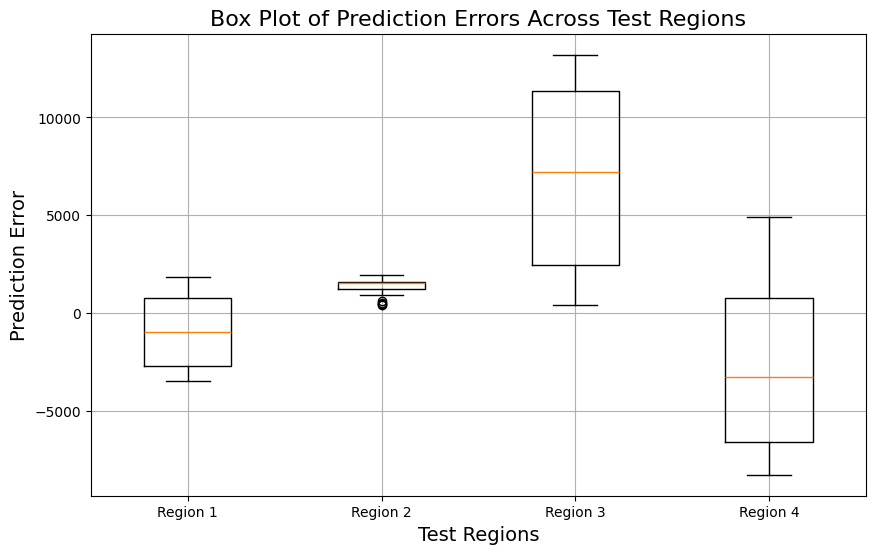

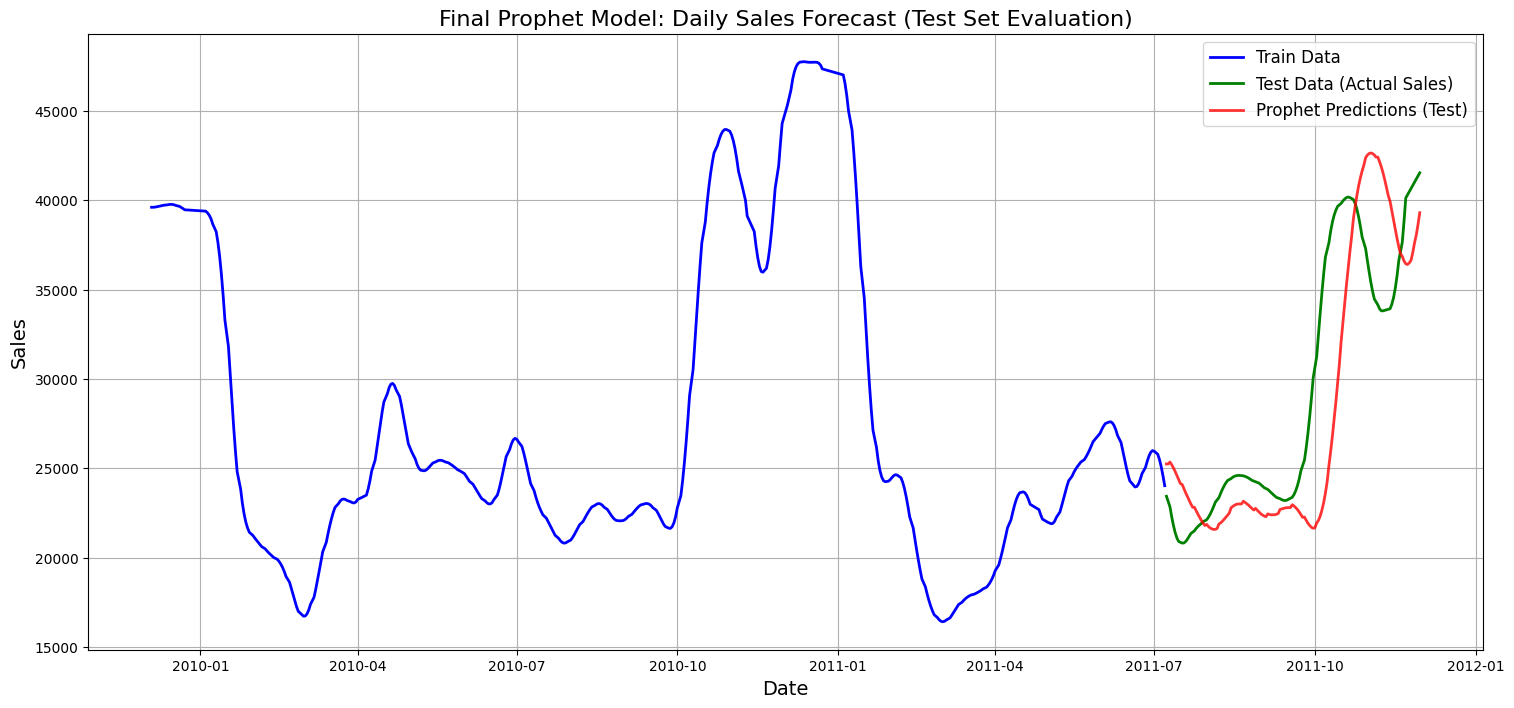

In [69]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
from itertools import product
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Ensure dataset is sorted
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# Remove extreme outliers (top 1% highest sales)
threshold = daily_sales_uk["y"].quantile(0.99)
daily_sales_uk = daily_sales_uk[daily_sales_uk["y"] < threshold]

# Apply Exponential Smoothing for smoothing
alpha = 0.2  # Adjust smoothing level as needed
daily_sales_uk["y_smooth"] = SimpleExpSmoothing(daily_sales_uk["y"]).fit(smoothing_level=alpha, optimized=False).fittedvalues
daily_sales_uk["y"] = daily_sales_uk["y_smooth"]  # Use smoothed values

# Define carrying capacity and floor
daily_sales_uk["cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk["floor"] = 0

# Train-Test Split (80%-20%)
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# Define Holidays
uk_holidays = pd.DataFrame({
    "holiday": ["New Year", "Good Friday", "Easter Monday", "Early May Bank Holiday",
                "Spring Bank Holiday", "Summer Bank Holiday", "Christmas Day",
                "Boxing Day", "Black Friday"] * 2,
    "ds": pd.to_datetime(["2010-01-01", "2010-04-02", "2010-04-05", "2010-05-03", "2010-05-31",
                          "2010-08-30", "2010-12-25", "2010-12-26", "2010-11-26",
                          "2011-01-01", "2011-04-22", "2011-04-25", "2011-05-02", "2011-05-30",
                          "2011-08-29", "2011-12-25", "2011-12-26", "2011-11-25"]),
    "lower_window": [0] * 18,
    "upper_window": [1] * 18
})

general_holidays = pd.DataFrame({
    "holiday": "holiday",
    "ds": pd.to_datetime(["2009-12-25", "2010-12-25", "2011-12-25", "2010-11-26", "2011-11-25",
                          "2010-07-04", "2011-07-04", "2010-01-01", "2011-01-01"]),
    "lower_window": -2,
    "upper_window": 2
})

all_holidays = pd.concat([uk_holidays, general_holidays])

# Hyperparameter Tuning
param_grid = {"changepoint_prior_scale": [0.1, 0.15, 0.2], "seasonality_mode": ["additive", "multiplicative"]}
param_combinations = list(product(*param_grid.values()))
best_mape = float("inf")
best_params = None
best_model = None

for params in param_combinations:
    prophet_model = Prophet(growth="logistic", changepoint_prior_scale=params[0], seasonality_mode=params[1],
                            daily_seasonality=True, yearly_seasonality=20, weekly_seasonality=10, holidays=all_holidays)
    prophet_model.fit(train)

    future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
    future["cap"] = train["cap"].max()
    future["floor"] = 0
    forecast_test = prophet_model.predict(future)

    actual_values = test.set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100

    if mape < best_mape:
        best_mape = mape
        best_params = params
        best_model = prophet_model

print(f"Best Hyperparameters: Changepoint Prior Scale = {best_params[0]}, Seasonality Mode = {best_params[1]}")
print(f"Best MAPE: {best_mape:.2f}%")

# Final Model Forecast
future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
future["cap"] = train["cap"].max()
future["floor"] = 0
forecast_test = best_model.predict(future)

# Apply Exponential Smoothing to forecasted values
forecast_test["yhat_smooth"] = SimpleExpSmoothing(forecast_test["yhat"]).fit(smoothing_level=alpha, optimized=False).fittedvalues

# Compute MAPE with smoothed forecast
overall_mape = mean_absolute_percentage_error(test.set_index("ds")["y"],
                                              forecast_test.set_index("ds").loc[test["ds"], "yhat_smooth"]) * 100
print(f"Overall MAPE on Smoothed Test Set (Exp Smoothing α={alpha}): {overall_mape:.2f}%")

# Error Analysis
num_regions = 4
region_size = len(test) // num_regions
mape_values = []

for i in range(num_regions):
    start_idx = i * region_size
    end_idx = (i + 1) * region_size if i < num_regions - 1 else len(test)
    actual_values = test.iloc[start_idx:end_idx].set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat_smooth"]
    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
    mape_values.append(mape)
    print(f"MAPE for Region {i + 1}: {mape:.2f}%")

# Box Plot of Errors
errors = test.set_index("ds")["y"] - forecast_test.set_index("ds").loc[test["ds"], "yhat_smooth"]
plt.figure(figsize=(10,6))
plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],
            labels=[f"Region {i+1}" for i in range(num_regions)])
plt.xlabel("Test Regions", fontsize=14)
plt.ylabel("Prediction Error", fontsize=14)
plt.title("Box Plot of Prediction Errors Across Test Regions", fontsize=16)
plt.grid()
plt.show()

# Plot Actual vs Predicted Sales
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat_smooth'], linestyle='-', label="Prophet Predictions (Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Final Prophet Model: Daily Sales Forecast (Test Set Evaluation)", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/pie28t6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/5apv28cu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5635', 'data', 'file=/tmp/tmpfzigd_5r/pie28t6v.json', 'init=/tmp/tmpfzigd_5r/5apv28cu.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_model0hpyyqu5/prophet_model-20250303003653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:54 - cmdstanpy - INFO - Chain [1] done processing
INF

Best Hyperparameters: Changepoint Prior Scale = 0.15, Seasonality Mode = additive
Best MAPE: 8.96%
Overall MAPE on Smoothed Test Set: 10.84%
MAPE for Region 1: 9.33%
MAPE for Region 2: 4.21%
MAPE for Region 3: 16.58%
MAPE for Region 4: 13.23%


<ipython-input-70-8ccc4977f5a2>:122: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],


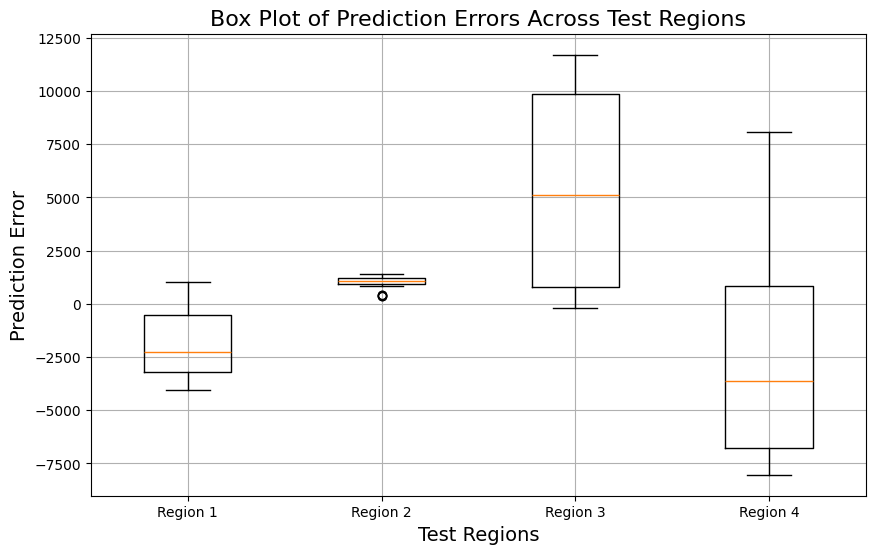

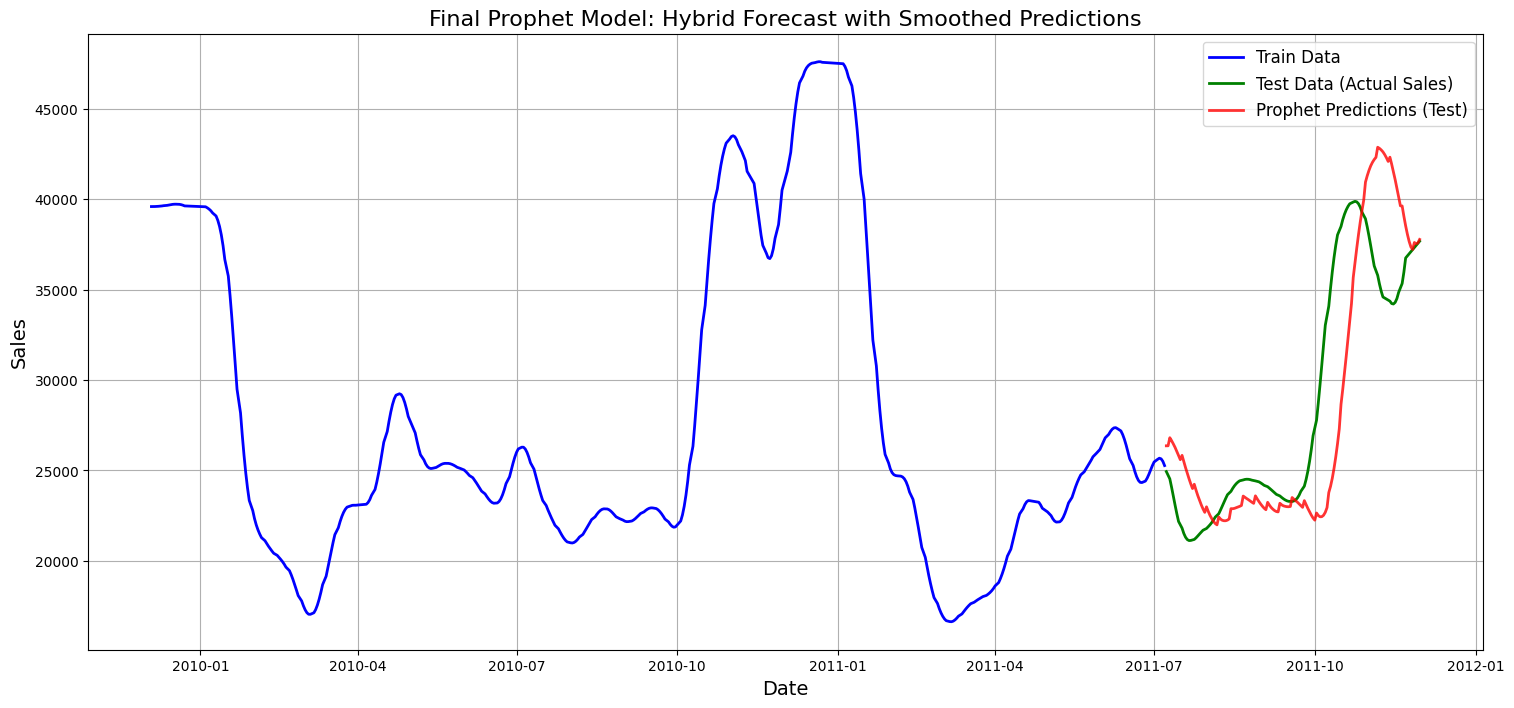

In [70]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy.stats.mstats import winsorize
from itertools import product
from sklearn.ensemble import GradientBoostingRegressor

# 📌 Load Data (Assuming 'ds' for Date & 'y' for Sales)
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# 📌 Winsorize Outliers (Top 1% Trimmed)
daily_sales_uk["y"] = winsorize(daily_sales_uk["y"], limits=[0, 0.01])

# 📌 Hybrid Smoothing: Moving Average (MA7) + Exponential Smoothing (Holt)
alpha = 0.2  # Smoothing factor for Holt's method
daily_sales_uk["y_smooth"] = (
    0.7 * daily_sales_uk["y"].rolling(window=7, min_periods=1).mean() +
    0.3 * SimpleExpSmoothing(daily_sales_uk["y"]).fit(smoothing_level=alpha, optimized=False).fittedvalues
)
daily_sales_uk["y"] = daily_sales_uk["y_smooth"]

# 📌 Define Carrying Capacity & Floor
daily_sales_uk["cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk["floor"] = 0

# 📌 Add Weekday as Regressor
daily_sales_uk["weekday"] = daily_sales_uk["ds"].dt.weekday

# 📌 Train-Test Split (80% Train, 20% Test)
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# 📌 Define UK Holidays
uk_holidays = pd.DataFrame({
    "holiday": ["New Year", "Good Friday", "Easter Monday", "Early May Bank Holiday",
                "Spring Bank Holiday", "Summer Bank Holiday", "Christmas Day",
                "Boxing Day", "Black Friday"] * 2,
    "ds": pd.to_datetime(["2010-01-01", "2010-04-02", "2010-04-05", "2010-05-03", "2010-05-31",
                          "2010-08-30", "2010-12-25", "2010-12-26", "2010-11-26",
                          "2011-01-01", "2011-04-22", "2011-04-25", "2011-05-02", "2011-05-30",
                          "2011-08-29", "2011-12-25", "2011-12-26", "2011-11-25"]),
    "lower_window": [0] * 18,
    "upper_window": [1] * 18
})

# 📌 Hyperparameter Tuning (Changepoint Scale & Seasonality Mode)
param_grid = {
    "changepoint_prior_scale": [0.1, 0.15, 0.2],
    "seasonality_mode": ["additive", "multiplicative"]
}
param_combinations = list(product(*param_grid.values()))

best_mape = float("inf")
best_params = None
best_model = None

for params in param_combinations:
    prophet_model = Prophet(
        growth="logistic",
        changepoint_prior_scale=params[0],
        seasonality_mode=params[1],
        daily_seasonality=True,
        yearly_seasonality=20,
        weekly_seasonality=10,
        holidays=uk_holidays,
    )
    prophet_model.add_regressor("weekday")  # Adding Regressor
    prophet_model.fit(train)

    future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
    future["cap"] = train["cap"].max()
    future["floor"] = 0
    future["weekday"] = future["ds"].dt.weekday

    forecast_test = prophet_model.predict(future)

    actual_values = test.set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100

    if mape < best_mape:
        best_mape = mape
        best_params = params
        best_model = prophet_model

print(f"Best Hyperparameters: Changepoint Prior Scale = {best_params[0]}, Seasonality Mode = {best_params[1]}")
print(f"Best MAPE: {best_mape:.2f}%")

# 📌 Final Model Forecast
future["cap"] = train["cap"].max()
future["floor"] = 0
forecast_test = best_model.predict(future)

# 📌 Apply Exponential Smoothing to Forecast
forecast_test["yhat_smooth"] = SimpleExpSmoothing(forecast_test["yhat"]).fit(smoothing_level=alpha, optimized=False).fittedvalues

# 📌 Compute MAPE with Smoothed Forecast
overall_mape = mean_absolute_percentage_error(test.set_index("ds")["y"], forecast_test.set_index("ds").loc[test["ds"], "yhat_smooth"]) * 100
print(f"Overall MAPE on Smoothed Test Set: {overall_mape:.2f}%")

# 📌 Error Analysis - Split into Regions
num_regions = 4
region_size = len(test) // num_regions
mape_values = []

for i in range(num_regions):
    start_idx = i * region_size
    end_idx = (i + 1) * region_size if i < num_regions - 1 else len(test)
    actual_values = test.iloc[start_idx:end_idx].set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat_smooth"]
    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
    mape_values.append(mape)
    print(f"MAPE for Region {i + 1}: {mape:.2f}%")

# 📌 Box Plot of Errors
errors = test.set_index("ds")["y"] - forecast_test.set_index("ds").loc[test["ds"], "yhat_smooth"]
plt.figure(figsize=(10,6))
plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],
            labels=[f"Region {i+1}" for i in range(num_regions)])
plt.xlabel("Test Regions", fontsize=14)
plt.ylabel("Prediction Error", fontsize=14)
plt.title("Box Plot of Prediction Errors Across Test Regions", fontsize=16)
plt.grid()
plt.show()

# 📌 Final Prophet Model Forecasting Plot
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat_smooth'], linestyle='-', label="Prophet Predictions (Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Final Prophet Model: Hybrid Forecast with Smoothed Predictions", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/lvn9aq9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/m0fa7nzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81980', 'data', 'file=/tmp/tmpfzigd_5r/lvn9aq9a.json', 'init=/tmp/tmpfzigd_5r/m0fa7nzt.json', 'output', 'file=/tmp/tmpfzigd_5r/prophet_modelam5u_3vg/prophet_model-20250303003705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:37:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/9ckcwg2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzigd_5r/hchngb7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best Hyperparameters: Changepoint Prior Scale = 0.2, Seasonality Mode = additive
Best MAPE: 5.93%
Overall MAPE on Test Set: 5.93%
MAPE for Region 1: 8.15%
MAPE for Region 2: 3.27%
MAPE for Region 3: 4.69%
MAPE for Region 4: 7.62%


<ipython-input-71-f924ad4124bc>:114: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],


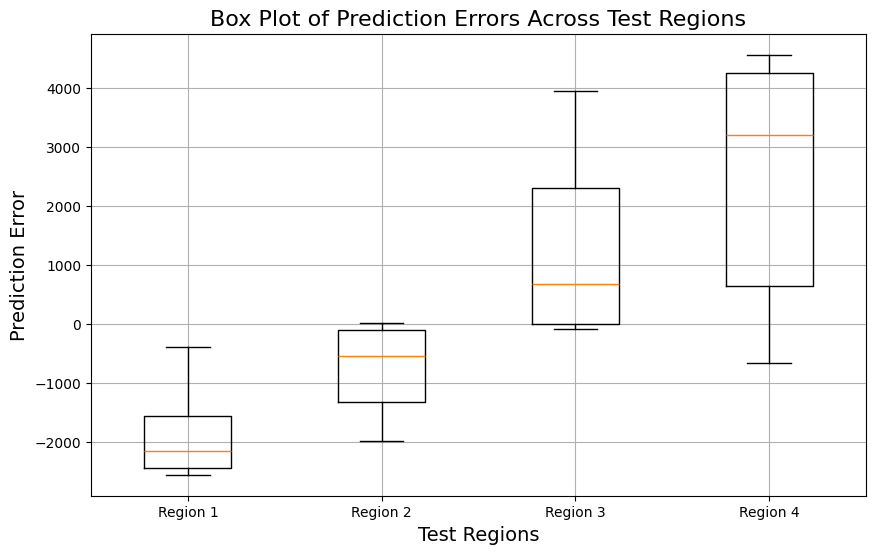

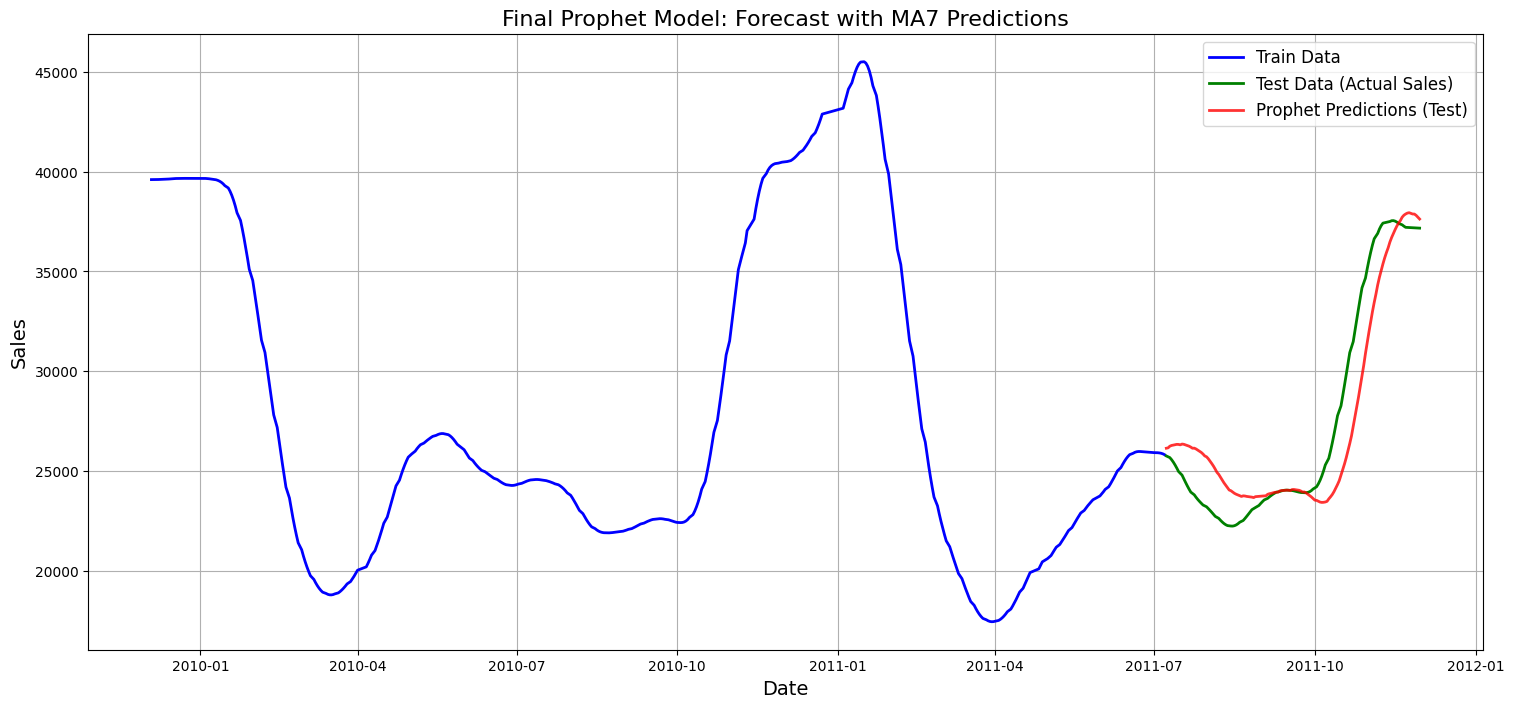

In [71]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy.stats.mstats import winsorize
from itertools import product
from sklearn.ensemble import GradientBoostingRegressor

# 📌 Load Data (Assuming 'ds' for Date & 'y' for Sales)
daily_sales_uk = daily_sales_uk.sort_values("ds").copy()

# 📌 Winsorize Outliers (Top 1% Trimmed)
daily_sales_uk["y"] = winsorize(daily_sales_uk["y"], limits=[0, 0.01])

# 📌 Moving Average (MA7) Smoothing
daily_sales_uk["y"] = daily_sales_uk["y"].rolling(window=30, min_periods=1).mean()

# 📌 Define Carrying Capacity & Floor
daily_sales_uk["cap"] = daily_sales_uk["y"].max() * 1.2
daily_sales_uk["floor"] = 0

# 📌 Add Weekday as Regressor
daily_sales_uk["weekday"] = daily_sales_uk["ds"].dt.weekday

# 📌 Train-Test Split (80% Train, 20% Test)
split_idx = int(len(daily_sales_uk) * 0.8)
train = daily_sales_uk.iloc[:split_idx]
test = daily_sales_uk.iloc[split_idx:]

# 📌 Define UK Holidays
uk_holidays = pd.DataFrame({
    "holiday": ["New Year", "Good Friday", "Easter Monday", "Early May Bank Holiday",
                "Spring Bank Holiday", "Summer Bank Holiday", "Christmas Day",
                "Boxing Day", "Black Friday"] * 2,
    "ds": pd.to_datetime(["2010-01-01", "2010-04-02", "2010-04-05", "2010-05-03", "2010-05-31",
                          "2010-08-30", "2010-12-25", "2010-12-26", "2010-11-26",
                          "2011-01-01", "2011-04-22", "2011-04-25", "2011-05-02", "2011-05-30",
                          "2011-08-29", "2011-12-25", "2011-12-26", "2011-11-25"]),
    "lower_window": [0] * 18,
    "upper_window": [1] * 18
})

# 📌 Hyperparameter Tuning (Changepoint Scale & Seasonality Mode)
param_grid = {
    "changepoint_prior_scale": [0.1, 0.15, 0.2],
    "seasonality_mode": ["additive", "multiplicative"]
}
param_combinations = list(product(*param_grid.values()))

best_mape = float("inf")
best_params = None
best_model = None

for params in param_combinations:
    prophet_model = Prophet(
        growth="logistic",
        changepoint_prior_scale=params[0],
        seasonality_mode=params[1],
        daily_seasonality=True,
        yearly_seasonality=20,
        weekly_seasonality=10,
        holidays=uk_holidays,
    )
    prophet_model.add_regressor("weekday")  # Adding Regressor
    prophet_model.fit(train)

    future = pd.DataFrame({"ds": pd.date_range(start=test["ds"].min(), end=test["ds"].max(), freq='D')})
    future["cap"] = train["cap"].max()
    future["floor"] = 0
    future["weekday"] = future["ds"].dt.weekday

    forecast_test = prophet_model.predict(future)

    actual_values = test.set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100

    if mape < best_mape:
        best_mape = mape
        best_params = params
        best_model = prophet_model

print(f"Best Hyperparameters: Changepoint Prior Scale = {best_params[0]}, Seasonality Mode = {best_params[1]}")
print(f"Best MAPE: {best_mape:.2f}%")

# 📌 Final Model Forecast
future["cap"] = train["cap"].max()
future["floor"] = 0
forecast_test = best_model.predict(future)

# 📌 Compute MAPE
overall_mape = mean_absolute_percentage_error(test.set_index("ds")["y"], forecast_test.set_index("ds").loc[test["ds"], "yhat"]) * 100
print(f"Overall MAPE on Test Set: {overall_mape:.2f}%")

# 📌 Error Analysis - Split into Regions
num_regions = 4
region_size = len(test) // num_regions
mape_values = []

for i in range(num_regions):
    start_idx = i * region_size
    end_idx = (i + 1) * region_size if i < num_regions - 1 else len(test)
    actual_values = test.iloc[start_idx:end_idx].set_index("ds")["y"]
    predicted_values = forecast_test.set_index("ds").loc[actual_values.index, "yhat"]
    mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
    mape_values.append(mape)
    print(f"MAPE for Region {i + 1}: {mape:.2f}%")

# 📌 Box Plot of Errors
errors = test.set_index("ds")["y"] - forecast_test.set_index("ds").loc[test["ds"], "yhat"]
plt.figure(figsize=(10,6))
plt.boxplot([errors.iloc[i*region_size:(i+1)*region_size] for i in range(num_regions)],
            labels=[f"Region {i+1}" for i in range(num_regions)])
plt.xlabel("Test Regions", fontsize=14)
plt.ylabel("Prediction Error", fontsize=14)
plt.title("Box Plot of Prediction Errors Across Test Regions", fontsize=16)
plt.grid()
plt.show()

# 📌 Final Prophet Model Forecasting Plot
plt.figure(figsize=(18,8))
plt.plot(train['ds'], train['y'], linestyle='-', label="Train Data", color='b', linewidth=2)
plt.plot(test['ds'], test['y'], linestyle='-', label="Test Data (Actual Sales)", color='g', linewidth=2)
plt.plot(forecast_test['ds'], forecast_test['yhat'], linestyle='-', label="Prophet Predictions (Test)", color='r', linewidth=2, alpha=0.8)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Final Prophet Model: Forecast with MA7 Predictions", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()
